In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Lesson 5 (19/10/2024)

*   Clustering means grouping items that are similar to each other.
*   Grouping similar products,  grouping similar articles or documents, and grouping similar customers for market segmentation are all examples of clustering.
*  The core principle of clustering is **minimizing the intra-cluster distance** and **maximizing the intercluster distance**.
*  The intra-cluster  distance is the distance between data items within a group, and the inter-cluster distance is the distance between different groups.
*  The data points are not labeled, so clustering is a  kind of unsupervised problem.
* There are various methods for clustering and each method  uses a different way to group the data points.


## Theory Lecture

### Distances

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
X = np.array([[8, 24], [14, 27], [14, 23]])
X

[[ 8 24]
 [14 27]
 [14 23]]


In [ ]:
pairwise_distances(X, metric='euclidean')

array([[0.        , 6.70820393, 6.08276253],
       [6.70820393, 0.        , 4.        ],
       [6.08276253, 4.        , 0.        ]])

In [ ]:
pairwise_distances(X, metric='manhattan')

array([[0., 9., 7.],
       [9., 0., 4.],
       [7., 4., 0.]])

In [ ]:
from scipy.spatial import distance

In [ ]:
distance.hamming([1,1,1,1], [0,1,1,0])

0.5

In [ ]:
distance.jaccard([1,1,1,0], [0,1,1,0])

0.3333333333333333

### $k$-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data=pd.DataFrame({"X":[1,3,4,5,1,4,1,2],
                   "Y":[3,3,3,3,2,2,1,1]})
data

,X,Y
0,1,3
1,3,3
2,4,3
3,5,3
4,1,2
5,4,2
6,1,1
7,2,1


In [ ]:
# number of clusters (k)
num_clusters = 3

In [ ]:
km = KMeans(n_clusters=num_clusters) # Creates an instance of the KMeans class
km.fit(data)  # The fit method computes the centroids of the k clusters based on the provided dataset
              # It minimizes the within-cluster sum of squares (WCSS)

KMeans(n_clusters=3)

In [ ]:
# Assigns each point to the nearest cluster centroid and returns an array of cluster labels for all the points in the dataset
pred=km.predict(data)
print(pred)

[2 0 0 0 1 0 1 1]


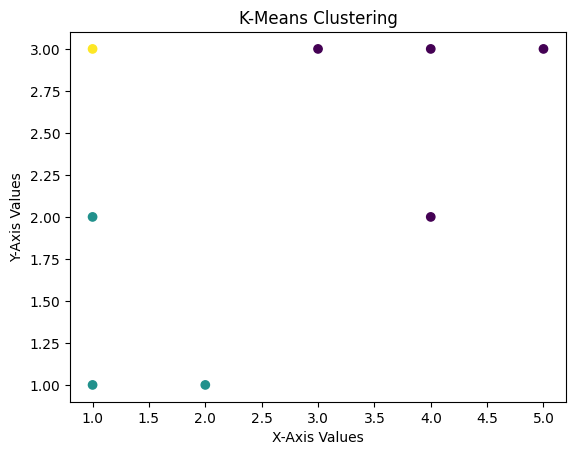

In [ ]:
# Plot the Clusters
plt.scatter(data.X, data.Y, c=pred, marker="o")
plt.title('K-Means Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.show()

* With **`random_state`**



In [ ]:
km = KMeans(n_clusters=num_clusters, random_state=7)
km.fit(data)
pred=km.predict(data)

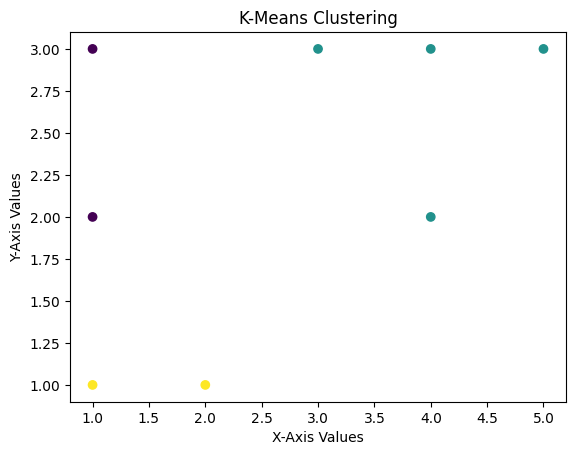

In [ ]:
# Plot the Clusters
plt.scatter(data.X, data.Y, c=pred, marker="o")
plt.title('K-Means Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.show()

In [ ]:
centroids=km.cluster_centers_
centroids

array([[1.  , 2.5 ],
       [4.  , 2.75],
       [1.5 , 1.  ]])

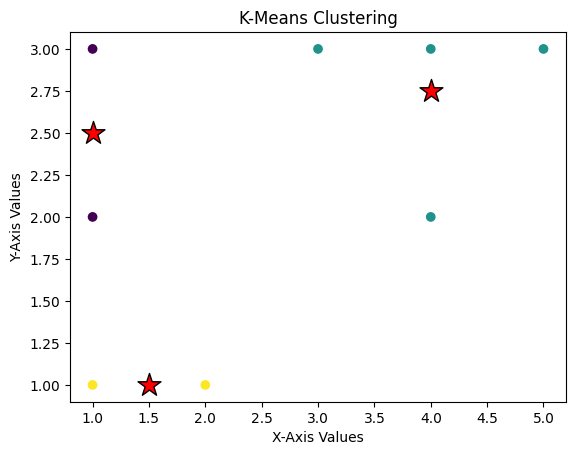

In [ ]:
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o")
plt.title('K-Means Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.scatter(centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.show()

In [ ]:
# numbers of clusters for observations (same output as km.predict(data))
# this is just an info command. It only gives info, but doesn't do anything, unlike
# km.predict(data), which besides giving the info, predicts the cluster labels for new data points
print(km.labels_)

[0 1 1 1 0 1 2 2]


In [ ]:
# within-cluster sum of squares (WCSS)
km.inertia_

3.75

In [ ]:
km = KMeans(n_clusters=num_clusters,random_state=7, verbose=2).fit(data)

Initialization complete
Iteration 0, inertia 7.0.
Iteration 1, inertia 3.75.
Converged at iteration 1: strict convergence.


The $k$-means algorithm aims to choose centroids that **minimize the inertia**, or **within-cluster sum-of-squares** criterion. Inertia can be recognized as a measure of how internally coherent clusters are.

## Laboratory Lecture

### Data Preparation

[Swiss dataset](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/swiss.html)
A data frame with 47 observations on 6 variables, each of which is in percent, i.e., in $[0,100]$.

* [ ,1]	Fertility:	$I_g$, "common standardized fertility measure"
* [ ,2]	Agriculture:	% of males involved in agriculture as occupation
* [ ,3]	Examination:	% draftees receiving highest mark on army examination
* [ ,4]	Education:	% education beyond primary school for draftees.
* [ ,5]	Catholic:	% 'catholic' (as opposed to 'protestant').
* [ ,6]	Infant.Mortality:	live births who live less than 1 year.

All variables but Fertility give proportions of the population.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving swiss.csv to swiss.csv


In [ ]:
swiss = pd.read_csv('/content/swiss.csv')
swiss

,Location,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6
5,Porrentruy,76.1,35.3,9,7,90.57,26.6
6,Broye,83.8,70.2,16,7,92.85,23.6
7,Glane,92.4,67.8,14,8,97.16,24.9
8,Gruyere,82.4,53.3,12,7,97.67,21.0
9,Sarine,82.9,45.2,16,13,91.38,24.4


In [ ]:
swiss.shape

(47, 7)

In [ ]:
# We remove the first column because we only work with numerical values
# data = swiss[swiss.columns[1:swiss.shape[1]]]
data = swiss.drop(columns=['Location'], axis=1)
data

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6
5,76.1,35.3,9,7,90.57,26.6
6,83.8,70.2,16,7,92.85,23.6
7,92.4,67.8,14,8,97.16,24.9
8,82.4,53.3,12,7,97.67,21.0
9,82.9,45.2,16,13,91.38,24.4


In [ ]:
data.shape

(47, 6)

**Data scaling**

$$
z=\frac{x-\mu}{\sigma}
$$
where $\mu$ is the mean of the feature and $\sigma$ is the standard deviation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() # used to standardize features by removing the mean and scaling them to unit variance
data_scaled = scaler.fit(data).transform(data)

### Finding the optimal number of clusters

#### The elbow method

 The elbow method is a well-known method for finding out the best number of clusters. In this method, we focus on the percentage of variance for the different numbers of clusters. The core concept of this method is to select the number of clusters that appending another cluster should not cause a huge change in the variance. We can plot a graph for the sum of squares within a cluster using the number of clusters to find the optimal value. The sum of squares is also known as the Within-Cluster Sum of Squares (WCSS) or inertia.
 \
 $$
 WCSS=\sum_{j=1}^k\sum_{i}^ndistance(x_i,c_j)^2
 $$

Here's a procedure for the method:

1. Plot the Elbow Curve:
 * On the x-axis, you have the number of clusters ($k$).
 * On the y-axis, you have the within-cluster sum of squares (WCSS) or inertia. This measures the total distance of points from their respective cluster centroids.

2. Look for the "Elbow":
 * The elbow point is where the graph transitions from a steep slope to a flatter slope.
 * Before the elbow, adding more clusters results in a significant decrease in WCSS.
 * After the elbow, increasing $k$ further results in diminishing returns, as WCSS decreases more gradually.

3. Optimal $k$:
 * The value of $k$ at the elbow point is considered optimal because it balances clustering performance with simplicity.
 * Too small a $k$ may result in underfitting, while too large a $k$ may lead to overfitting or unnecessary complexity.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss_list=[]

for k in range(1,10):
  kmeans_model=KMeans(n_clusters=k,random_state=7)
  kmeans_model.fit(data_scaled)
  wcss_list.append(kmeans_model.inertia_)

In [ ]:
wcss_list

[282.00000000000006,
 185.0605947427013,
 126.9052597274396,
 104.63836314440911,
 88.47023052292747,
 75.31246232860809,
 67.44981696777185,
 56.86483684865787,
 46.993159226702154]

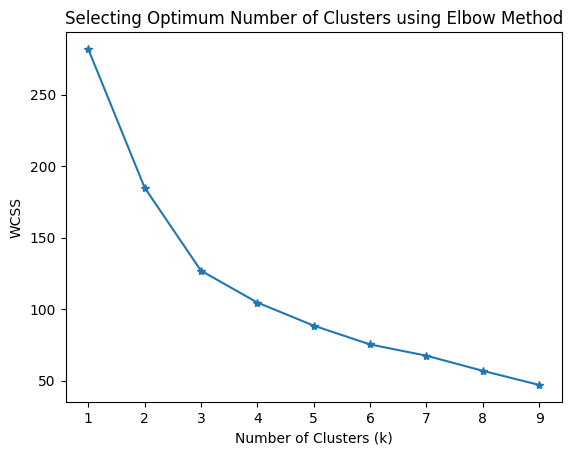

In [ ]:
# Plot the inertia (WCSS) and number of clusters
plt.plot(range(1, 10), wcss_list,  marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

#### The silhouette method

 The silhouette method assesses and validates cluster data. It finds how well each data point is classified. The plot of the silhouette score helps us to visualize and interpret how well data points are tightly grouped within their own clusters and separated from others. It helps us to evaluate the number of clusters. Its score ranges from $-1$ to $+1$. A positive value indicates a well-separated cluster and a negative value indicates incorrectly assigned data points. The more positive the value, the further data points are from the nearest clusters; a value of zero indicates data points that are at the separation line between two clusters. The formula for the silhouette score
 \
 $$
s(i)=\dfrac{b_i-a_i}{max(b_i,a_i)}
 $$

**Example:** Imagine you have groups of people. The silhouette score tells you, on average, how well each person fits within their group and how distinct their group is from other groups. A high score means the groups are well-defined and people within a group are similar to each other, while groups are different from each other. A low score suggests there's a lot of overlap or confusion in the groupings.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score_list=[]

for k in range(2,10): # starts at 2 because the silhouette score requires at least two clusters to measure separation
  kmeans_model = KMeans(n_clusters=k, random_state=7)
  kmeans_model.fit(data_scaled)
  pred = kmeans_model.predict(data_scaled)
  score = silhouette_score(data_scaled, pred, metric="euclidean") # returns the mean of the silhouette score of all points
  score_list.append(score)

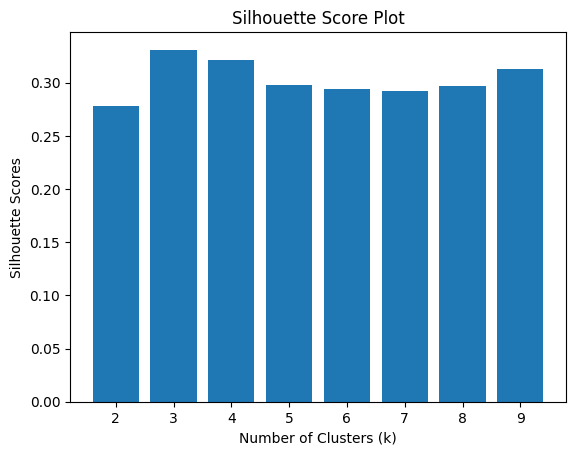

In [ ]:
# Plot the Silhouette score and number of cluster
plt.bar(range(2, 10), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.show()

We observe that the best option is `num_clusters=3`

### $k$-means clustering

In [ ]:
num_clusters=3

In [ ]:
# Create and fit the kMeans model
km=KMeans(n_clusters=num_clusters,random_state=7)
km.fit(data_scaled) # creates the centroids of the k clusters minimizing WCSS
pred=km.predict(data_scaled) # assigns each point to their nearest cluster
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1,
       2, 2, 2], dtype=int32)

In [ ]:
km.inertia_ # wcss

126.9052597274396

#### Evaluating clustering performance

The **silhouette score** is a metric used to evaluate the quality of clustering. It measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation).

For each point $i$:

 1. Intra-cluster distance $a(i)$:
  - The average distance from $i$ to all other points in the same cluster.
  - Smaller values are better, indicating tight clustering.

 2. Nearest-cluster distance $b(i)$:
  - The average distance from $i$ to all points in the nearest (other) cluster.
  - Larger values are better, indicating good separation.

 3. **Silhouette coefficient** $s(i)$:
 $$
  s(i) = \frac{b(i)-a(i)}{\max\{a(i),b(i)\}},
 $$

  * $s(i)\in[-1,1]$
  * $s(i)>0$: The point is closer to its own cluster than to others (good clustering).
  * $s(i)\approx 0$: The point lies on the decision boundary between two clusters.
  * $s(i)< 0$: The point is closer to another cluster than its own (poor clustering).

**Example:** Imagine you have groups of people. The silhouette score tells you, on average, how well each person fits within their group and how distinct their group is from other groups. A high score means the groups are well-defined and people within a group are similar to each other, while groups are different from each other. A low score suggests there's a lot of overlap or confusion in the groupings.

In [ ]:
# This function returns the mean silhouette score for all data points in the dataset
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, pred, metric="euclidean")

NameError: name 'data_scaled' is not defined

In [ ]:
# This function returns the silhouette coefficient for each point in the dataset
from sklearn.metrics import silhouette_samples
silhouette_samples(data_scaled,pred)

array([ 0.3067417 ,  0.34784857,  0.34404806,  0.11808917,  0.44518226,
        0.20460266,  0.35852147,  0.36923436,  0.40316989,  0.24216268,
        0.39144485,  0.44889889,  0.46625774,  0.43703211,  0.49046662,
        0.32796309,  0.51353323,  0.29103102,  0.10275304,  0.47961507,
        0.51791122,  0.4221211 ,  0.32158078,  0.3927922 ,  0.32351478,
        0.31540332,  0.25483646,  0.4486088 , -0.00950228,  0.45514351,
        0.29482115,  0.37963844,  0.40084124,  0.34673491,  0.45145845,
        0.26549367,  0.35467654,  0.29627996,  0.36536267, -0.12094042,
        0.25384992,  0.24808466,  0.44759351,  0.27608576,  0.35192521,
        0.11085332,  0.30224652])

Observations in the wrong clusters (those with a negative silhouette value)

In [ ]:
silhouette_vals=silhouette_samples(data,pred)
swiss[silhouette_vals<0]

,Location,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
40,Le Locle,72.7,16.7,22,13,11.22,18.9
43,ValdeTravers,67.6,18.7,25,7,8.65,19.5


**Silhouette chart generation**

In [ ]:
cluster_labels=np.unique(pred)
cluster_labels

array([0, 1, 2], dtype=int32)

In [ ]:
from matplotlib import cm # cm class: built-in colormaps, colormap handling utilities

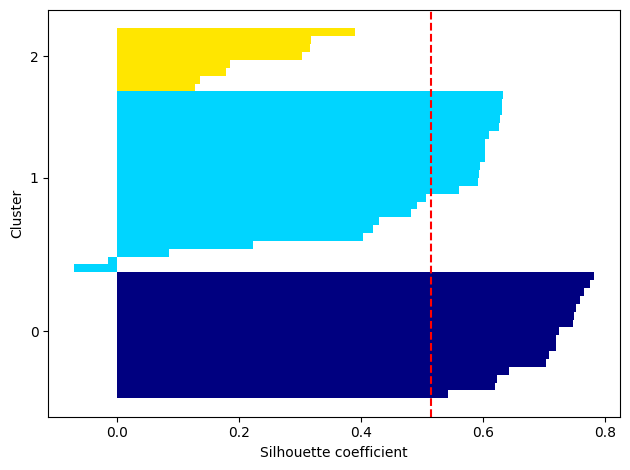

In [ ]:
y_ax_lower, y_ax_upper = 0, 0 # vertical bounds of the bar plot for each cluster
                              # the range from y_ax_lower to y_ax_upper represents the vertical span for a given cluster
yticks = [] # vertical midpoint for each cluster's bar (just for labeling on the y-axis of the figure)
for i, c in enumerate(cluster_labels):
    '''
    This loop creates horizontal bar plots for the silhouette values of each cluster,
    stacking them vertically for visualization. Each bar represents the silhouette values
    of points within a single cluster, sorted in ascending order.
    '''
    c_silhouette_vals = silhouette_vals[pred == c] # a list with all silhouettle values from the same cluster
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals) # moves the upper limit by the number of points in the current cluster
    color = cm.jet(float(i) / num_clusters) # assigns a unique color to each cluster based on its index
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.) # appends the vertical midpoint of the bar for labeling this cluster on the y-axis
    y_ax_lower += len(c_silhouette_vals) # updates the starting position for the next cluster (y_ax_lower=y_ax_upper, ONLY AT THIS POINT)

# Compute the average silhouette score across all clusters and plot it as a vertical dashed red line
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels) # just to label the clusters on the y-axis of the figure
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
#Procedures that adjust the parameters of the plot so that they are well matched to the figure.
plt.tight_layout()
plt.show()

#### Yellowbrick

Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it's using Matplotlib.

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=3, random_state=7))

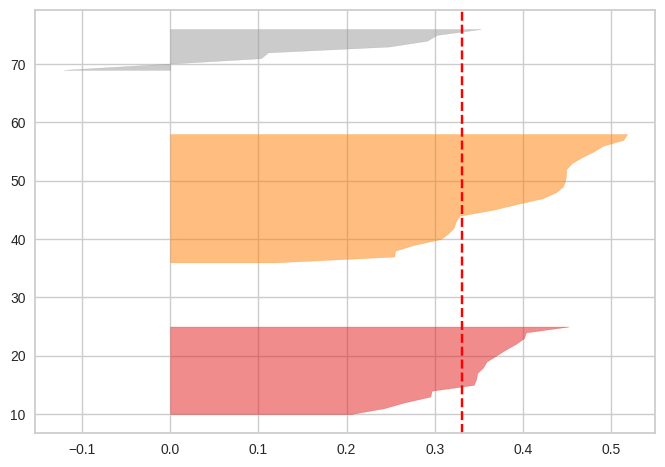

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer=SilhouetteVisualizer(km)
visualizer.fit(data_scaled)

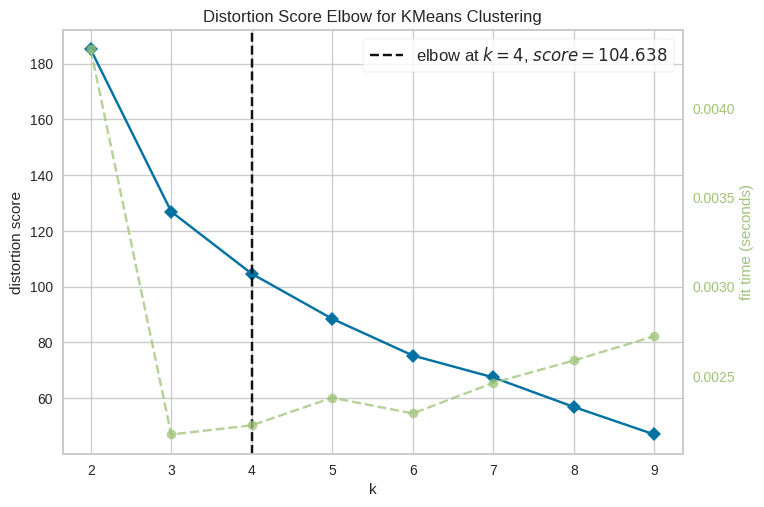

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(data_scaled)
visualizer.show()

The within-cluster SSE (distortion): it evaluates the clustering performance based on inertia (WCSS).

The KElbowVisualizer also displays the amount of time to train the clustering model as a dashed green line, but it can be hidden by setting `timings=False`.

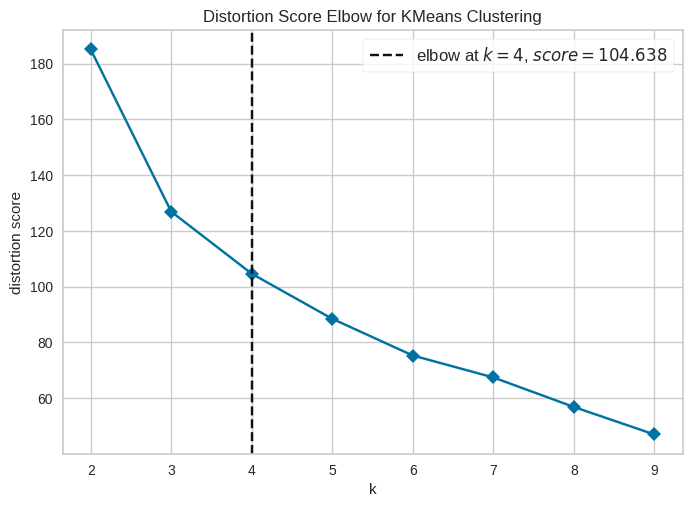

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(km, k=(2,10), timings=False) # metric='distortion' is the default, which is using inertia
visualizer.fit(data_scaled)
visualizer.show()

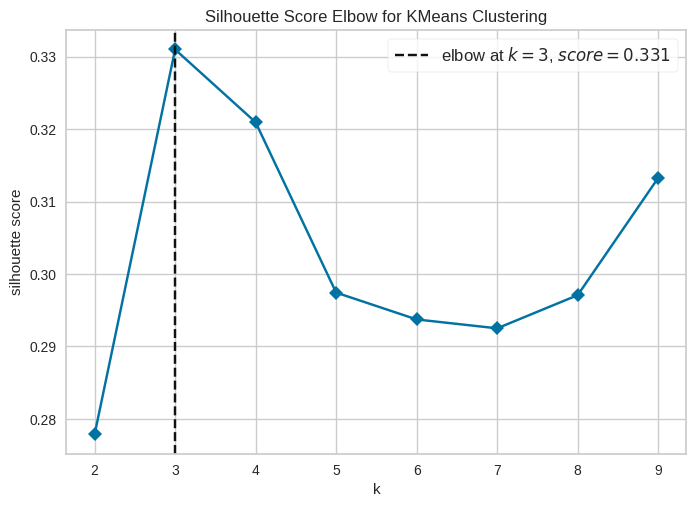

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(km, k=(2,10), timings=False, metric='silhouette') # to use silhouette instead of inertia
visualizer.fit(data_scaled)
visualizer.show()

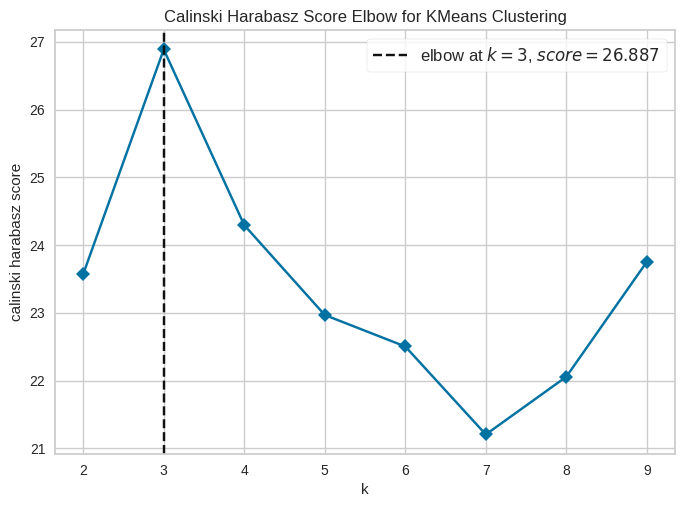

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
visualizer = KElbowVisualizer(km, k=(2,10), timings=False, metric='calinski_harabasz')
visualizer.fit(data_scaled)
visualizer.show()

Calinski Harabasz Index is defined as the ratio of the between-cluster separation (BCSS) to the within-cluster dispersion (WCSS).

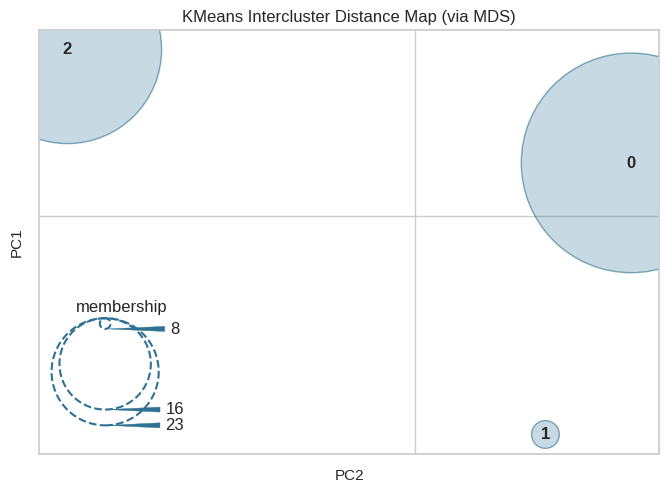

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(KMeans(n_clusters=num_clusters, init='k-means++', random_state=1))
visualizer.fit(data_scaled) # Fit the data to the visualizer
visualizer.show()

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

### Description of the obtained clusters  

In [ ]:
# We have to run this code again because in the yellowbrick section km was messed up
km = KMeans(n_clusters=num_clusters, random_state=7)
km.fit(data_scaled)
pred = km.predict(data_scaled)

In [ ]:
'''
 - Each row represents a cluster (one row per cluster).
 - The number of columns corresponds to the number of features in the dataset:
     * Since the dataset has 6 features ('data' had 6 columns), the number of columns is 6.
     * Each column represents the mean value of that feature for all points in the cluster.
'''
print(km.cluster_centers_)

[[ 0.84215643  0.66133926 -0.89348263 -0.45768129  1.33319862  0.28888916]
 [-0.09245385  0.01031363  0.13080394 -0.29028257 -0.80665601 -0.07059506]
 [-1.41850804 -1.3523302   1.41090393  1.74992498 -0.34726122 -0.37481753]]


In [ ]:
# data['Cluster']=pred # this also works
data.loc[:, 'Cluster'] = pred # better (it avoids warnings)

In [ ]:
print("Cluster summary")
summary=data.groupby('Cluster').mean()  # Rows correspond to clusters
                                        # Columns correspond to the mean feature values for each cluster
summary['count']=data['Cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
summary

Cluster summary


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,count
Cluster,,,,,,,
1,69.0000,50.891304,17.521739,8.217391,7.862174,19.73913,23
0,80.5500,65.518750,9.437500,6.625000,96.150000,20.77500,16
2,52.6125,20.275000,27.625000,27.625000,26.816250,18.86250,8


Let's make here a few comments. We can focus on the `Catholic` column, which is really representative of each cluster due to the difference among them. We observe that in Cluster 0, the 96% are catholic, so it's indeed a Catholic group, while in Cluster 1, only the 8% are Catholics, leaving a 92% of protestants, thus this is the Protestant group. Finally, in the Cluster 2, with a 27% of catholics, there's more mingled religion

<Axes: >

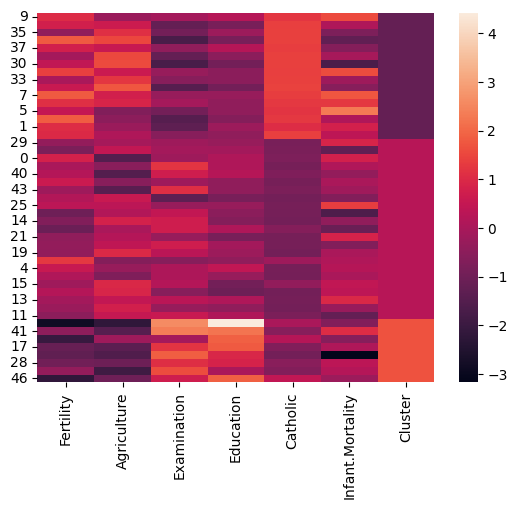

In [ ]:
data_scaled = scaler.fit_transform(data)
df = pd.DataFrame(data_scaled, columns=data.columns).sort_values(by='Cluster')
sns.heatmap(df)

<Axes: >

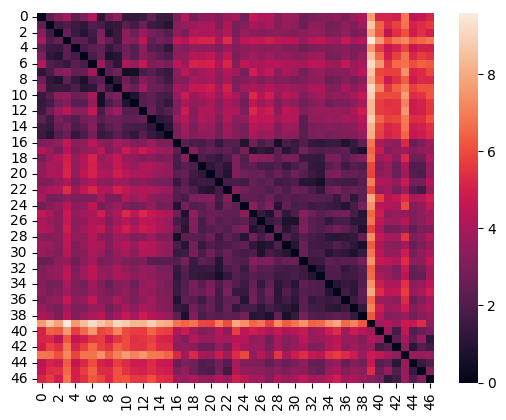

In [ ]:
from scipy.spatial.distance import pdist, squareform

'''
 - Computes the pairwise distances between rows in df
'''
dist = pdist(df, metric='euclidean')

'''
 - Converts the condensed distance array into a square, symmetric matrix.
 - Each entry (i, j) represents the distance between row i and row j in df.
'''
dist = squareform(dist)

sns.heatmap(dist)

Distance matrix computation from a collection of raw observation vectors stored in a rectangular array.
[scipy](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

**---------------------------------------------------------------------------------------------------------------**


*  **This is the end of the lab class**

*  **Now there's an apendix of two extra files**

## Appendix

### Hierarchical Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data.csv


In [ ]:
data = pd.read_csv('/content/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
data_for_clustering = data.drop('country',axis=1)
data_for_clustering

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit(data_for_clustering).transform(data_for_clustering)

#### Linkage

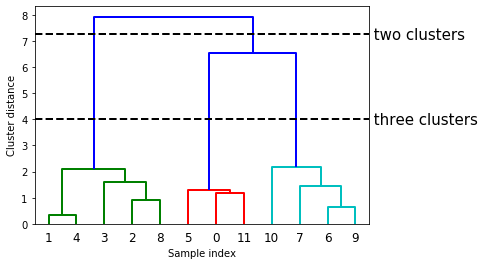

**Ward's method**

 * It minimizes the variance within clusters at each merging step.
 * It results in more compact, spherical clusters compared to other methods like single or complete linkage.
 * For every pair of clusters, Ward’s method calculates the increase in variance that would result from merging those clusters.
 * It selects the pair of clusters that results in the smallest increase in variance.

In [ ]:
linkage_matrix = linkage(data_scaled, method='ward')  # Ward’s method minimizes the variance within each cluster
                                                      # metric='euclidean' by default
linkage_matrix

array([[4.10000000e+01, 1.21000000e+02, 2.70510920e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.45939626e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.23131474e-01, 2.00000000e+00],
       [1.11000000e+02, 1.58000000e+02, 4.94330379e-01, 2.00000000e+00],
       [6.00000000e+01, 1.22000000e+02, 5.44105161e-01, 2.00000000e+00],
       [1.00000000e+02, 1.69000000e+02, 5.58805736e-01, 3.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59540632e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.68799380e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90319960e-01, 2.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04562360e-01, 2.00000000e+00],
       [6.00000000e+00, 7.60000000e+01, 6.13397046e-01, 2.00000000e+00],
       [5.60000000e+01, 1.29000000e+02, 6.27531275e-01, 2.00000000e+00],
       [4.30000000e+01, 1.35000000e+02, 6.39912838e-01, 2.00000000e+00],
       [5.10000000e+01, 9.00000000e+01, 6.49519933e

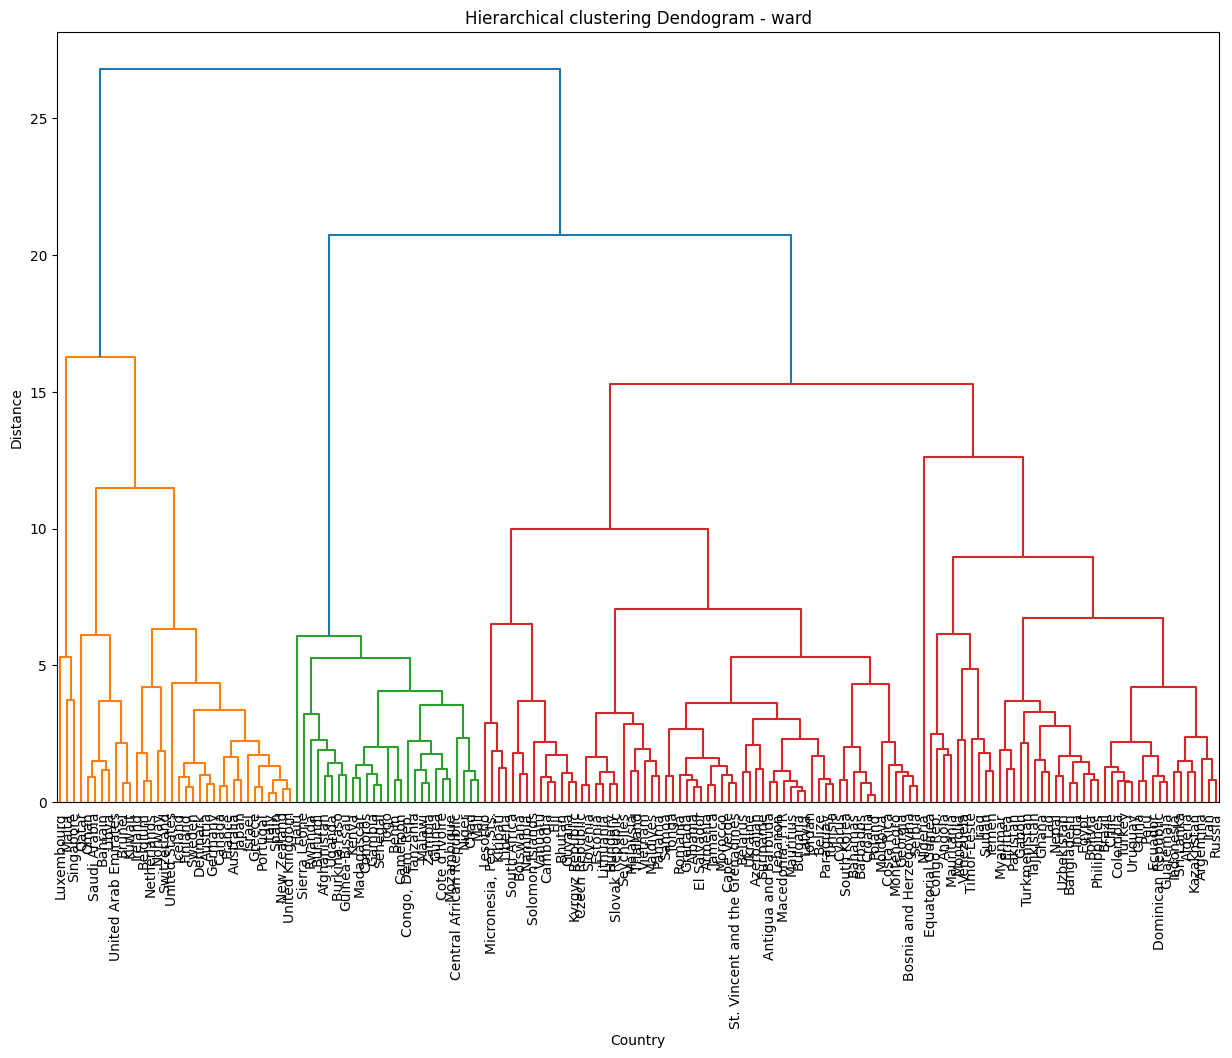

In [ ]:
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, labels=data['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical clustering Dendogram - ward")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

**Single Method**

The single linkage method defines the distance between two clusters as the minimum distance between any pair of points, one from each cluster. This is how it works:

 * *Initial State:* Each data point starts as its own cluster.
 * *Distance Calculation:* The distance between two clusters is defined as the shortest distance between any point in one cluster and any point in the other cluster.
 * *Cluster Merging:*
   - At each step, the pair of clusters with the minimum distance is merged.
   - This process is repeated until all points are grouped into a single cluster.

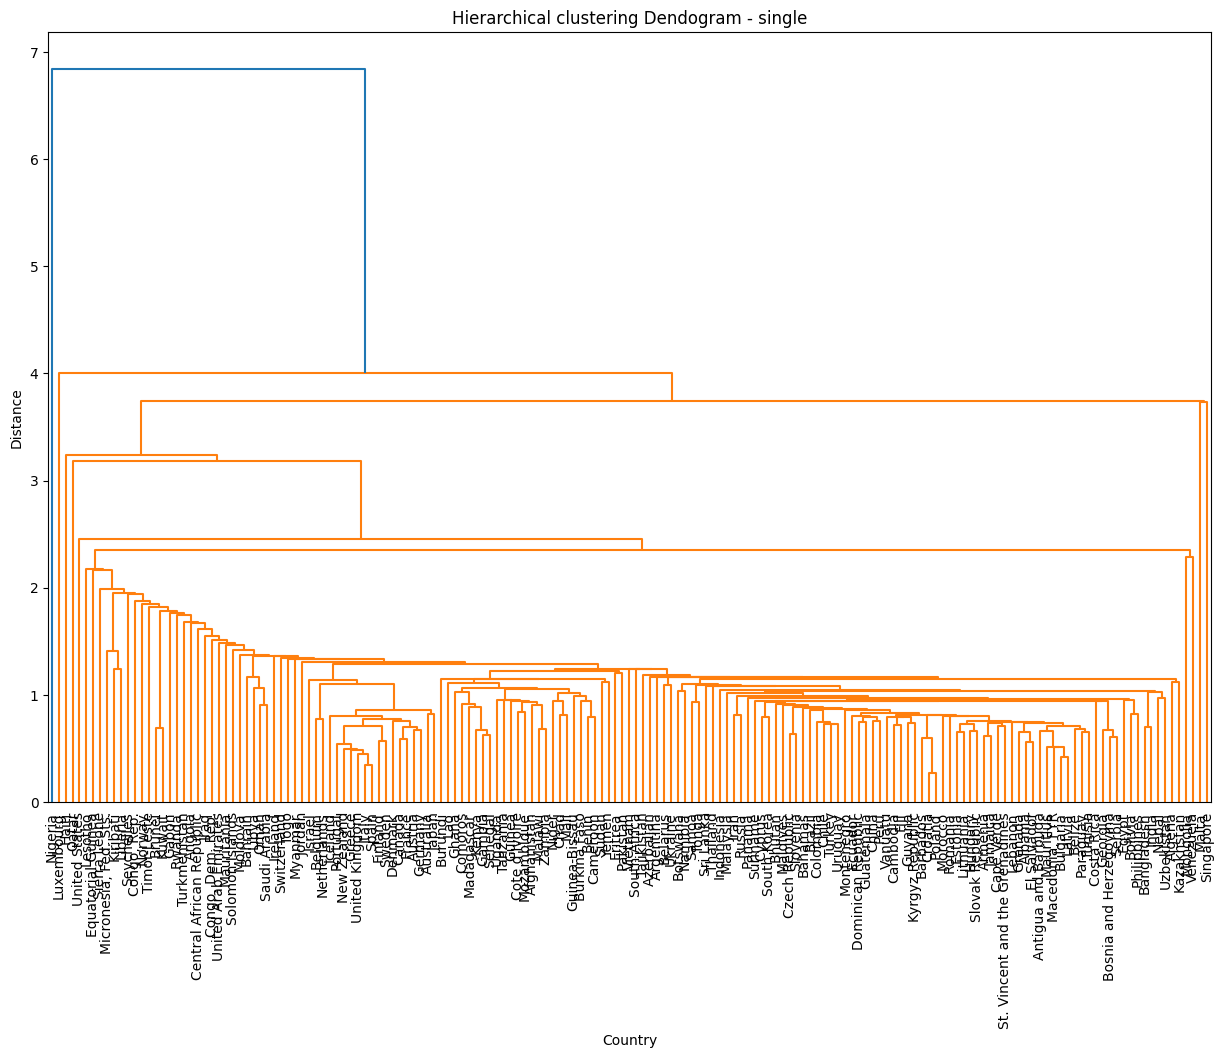

In [ ]:
linkage_matrix = linkage(data_scaled, method='single') # 'single': Minimum (or nearest) linkage
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, labels=data['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical clustering Dendogram - single")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

**Complete method**

The distance between two clusters is defined as the maximum distance between any two points in the two clusters. This results in more compact and evenly shaped clusters compared to single linkage.

 * *Initial State:* Each data point starts as its own cluster.
 * *Distance Calculation:* The distance between two clusters is defined as the largest distance between any point in one cluster and any point in the other cluster.
 * *Cluster Merging:*
   - At each step, the pair of clusters with the smallest maximum distance is merged.
   - This process continues until all points are grouped into a single cluster.

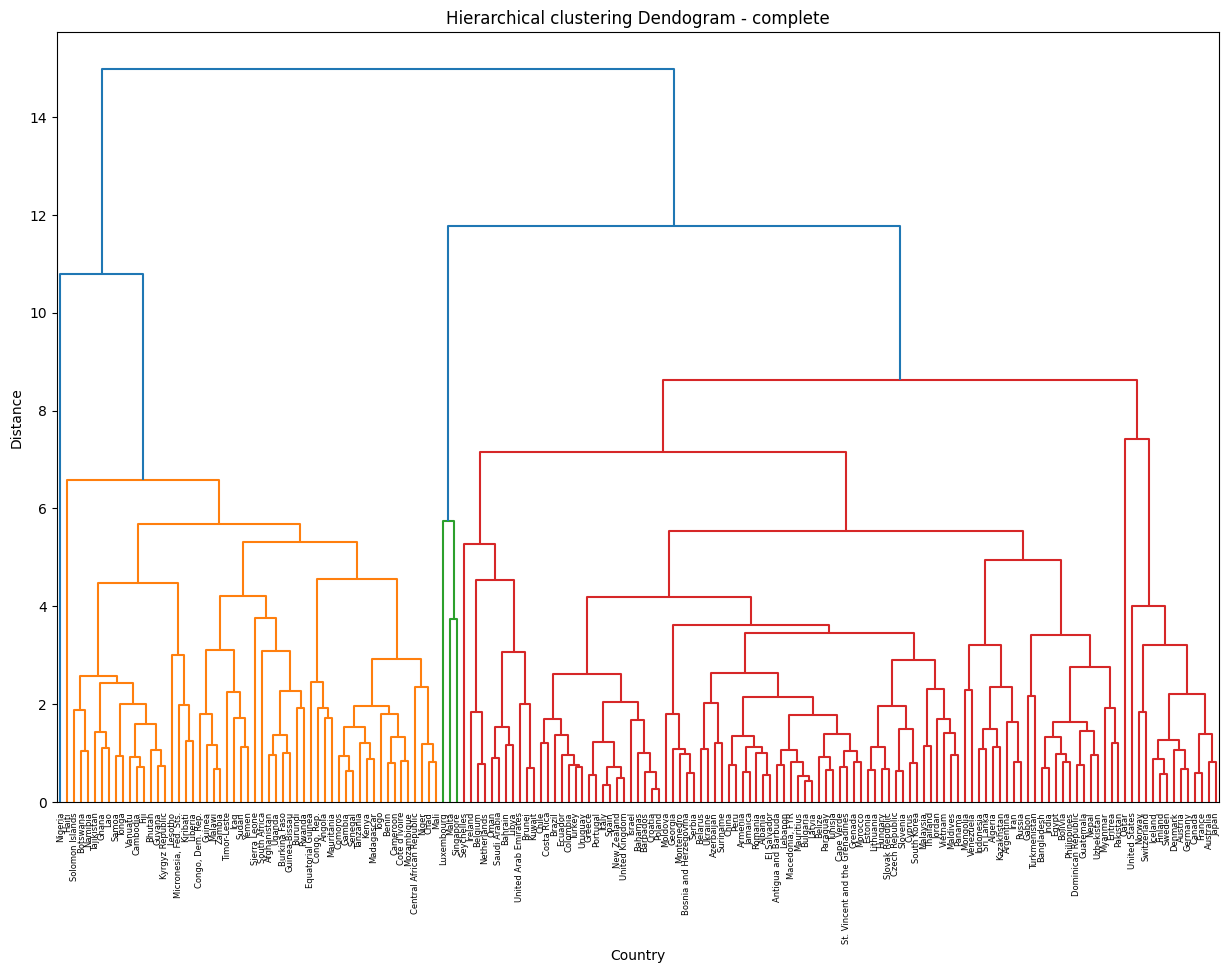

In [ ]:
linkage_matrix = linkage(data_scaled, method='complete') # 'complete': Maximum (or farthest) linkage
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, labels=data['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical clustering Dendogram - complete")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

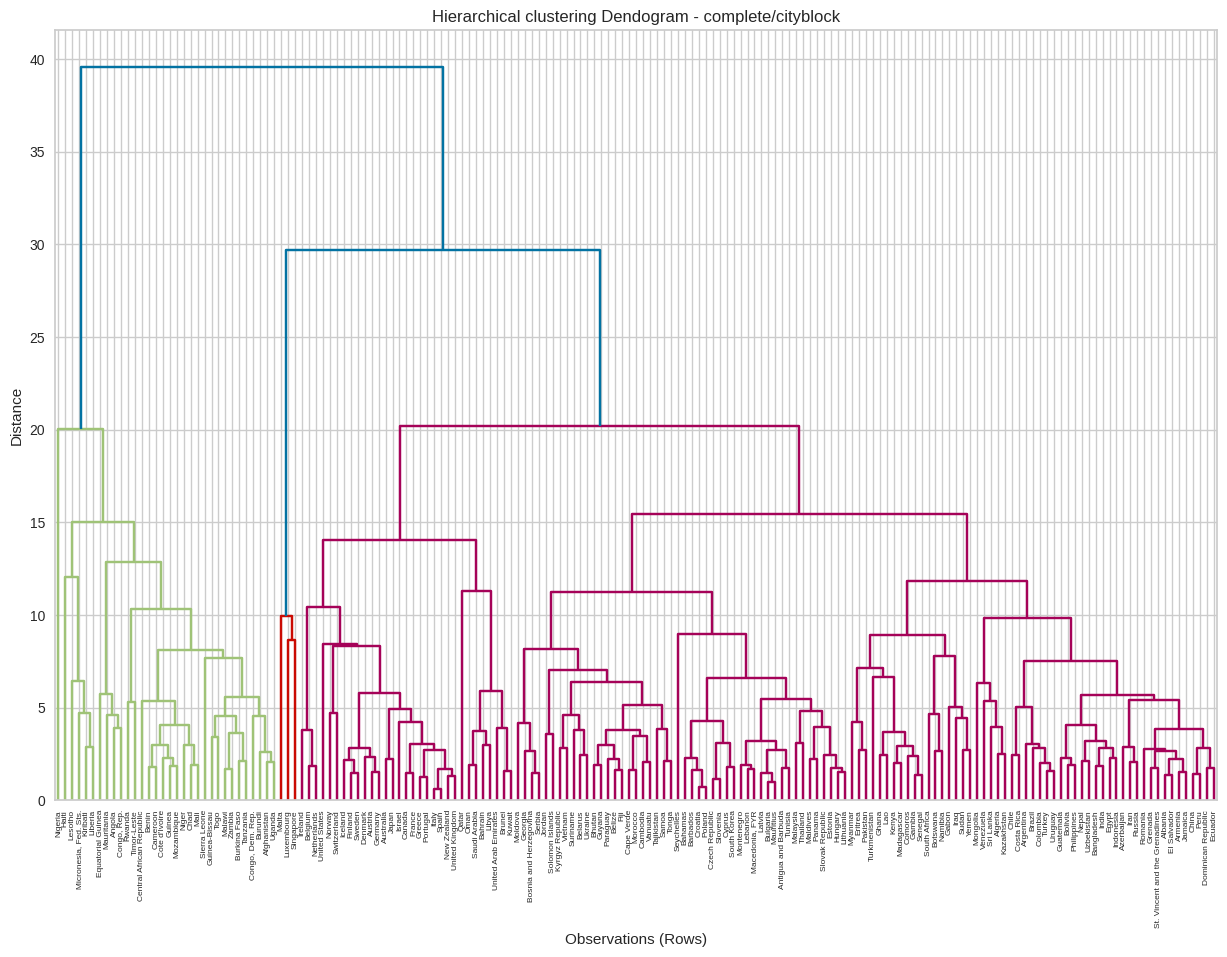

In [ ]:
linkage_matrix = linkage(data_scaled, metric='cityblock', method='complete') # citiblock indicates the use of the Manhattan distance
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, labels=data['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical clustering Dendogram - complete/cityblock")
plt.xlabel('Observations (Rows)')
plt.ylabel('Distance')
plt.show()

#### Agglomerative clustering

Agglomerative clustering is a type of hierarchical clustering that starts with each data point as its own cluster and iteratively merges the two closest clusters until the desired number of clusters (`n_clusters`) is reached.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
pred = ac.fit_predict(data_scaled)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
ac.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 3}

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
silhouette_score(data_scaled, pred)

0.29005247526122313

In [ ]:
silhouette_vals=silhouette_samples(data_scaled, pred)
silhouette_vals

array([ 0.46660223,  0.38513305,  0.24608644,  0.35547117,  0.41975002,
        0.28070423,  0.29599774,  0.39248107,  0.41391483,  0.23913542,
        0.42890491,  0.40179065,  0.08894813,  0.44023635,  0.31434508,
        0.36394838,  0.23581847,  0.41190251, -0.16027166,  0.07094823,
        0.34579086,  0.14465162,  0.30650372,  0.29495415,  0.41406631,
        0.46581692,  0.37844194,  0.00702736,  0.42696419,  0.40149005,
        0.17874969,  0.39348309,  0.43841843,  0.44888775,  0.34835345,
        0.33406578,  0.35985778,  0.43651894,  0.21929847,  0.37269928,
        0.44366494,  0.46310538,  0.46083574,  0.43933776,  0.37603875,
        0.27267249,  0.30638705,  0.12144396,  0.3122802 ,  0.19269724,
       -0.26837704,  0.39389223, -0.11037739,  0.43500501,  0.38972012,
       -0.15150616,  0.40275165,  0.2794823 ,  0.4158082 ,  0.3574433 ,
        0.43468906,  0.30216321,  0.09146437,  0.4619727 ,  0.43394005,
       -0.02502904,  0.29613479,  0.36373249,  0.43576071, -0.03

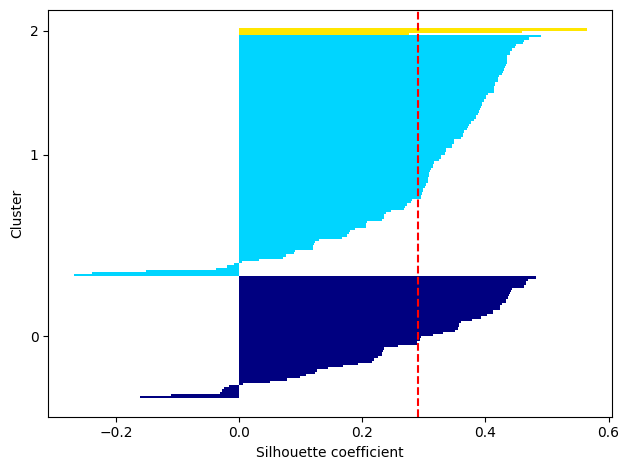

In [ ]:
from matplotlib import cm
num_clusters=3
cluster_labels = np.unique(pred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / num_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
#Procedures that adjust the parameters of the plot so that they are well matched to the figure.
plt.tight_layout()
plt.show()

In [ ]:
# data_for_clustering['Cluster']= pred # this also works
data_for_clustering.loc[:, 'Cluster'] = pred # better (it avoids warnings)

In [ ]:
print('Cluster summary:')
summary = data_for_clustering.groupby(['Cluster']).mean()
summary['Count'] = data_for_clustering['Cluster'].value_counts()
summary = summary.sort_values(by='Count', ascending=False)
summary

Cluster summary:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Count
Cluster,,,,,,,,,,
1,17.028440,42.291550,6.909358,43.039137,22581.559633,6.478321,75.302752,2.098073,17310.458716,109
0,82.229091,31.407636,6.631273,48.534545,3812.236364,10.655000,60.554545,4.717818,1917.709091,55
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,3


### Hopkins Statistic Clustering

**Clustering Tendency**

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
However, clustering algorithms will locate and specify clusters in data even if none are present. It is therefore appropriate to measure the clustering tendency or randomness of a data set before subjecting it to a clustering algorithm.


**Assessing Clustering Tendency using Hopkins' Statistic**

Hopkins' statistic is a simple measure of clustering tendency. It is based on the difference between the distance from a real point to its nearest neighbor, U, and the distance from a randomly chosen point within thedata space to the nearest real data point, W.  

In [ ]:
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
from random import sample
from numpy.random import uniform

**Algorithm**

- Let X be the set of $n$ data points.
- Consider a random sample (without replacement) of $m<<n$ data points with members $x(i)$. [(Lawson and Jurs (1990))](https://pubs.acs.org/doi/abs/10.1021/ci00065a010) suggest choosing $5\%$ of the data points so that the nearest-neighbor distances will be independent and thus approximate a Beta distribution.
- Generate a set $Y$ of $m$ uniformly randomly distributed data points.
- Define two distance measures,
    - $u(i)$, the distance of $y(i)$ in $Y$ from its nearest neighbour in $X$, and
    - $w(i)$, the distance of $x(i)$ in $X$ from its nearest neighbour in $X$.
- if the data is $d$-dimensional, then the Hopkins statistic is defined as:

<a href="https://www.codecogs.com/eqnedit.php?latex=H&space;=&space;\frac{\sum_{i=1}^{m}&space;u_{i}^{d}}{\sum_{i=1}^{m}&space;u_{i}^{d}&space;&plus;&space;\sum_{i=1}^{m}&space;w_{i}^{d}}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?H&space;=&space;\frac{\sum_{i=1}^{m}&space;u_{i}^{d}}{\sum_{i=1}^{m}&space;u_{i}^{d}&space;&plus;&space;\sum_{i=1}^{m}&space;w_{i}^{d}}" title="H = \frac{\sum_{i=1}^{m} u_{i}^{d}}{\sum_{i=1}^{m} u_{i}^{d} + \sum_{i=1}^{m} w_{i}^{d}}" /></a>

In [ ]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):

    X=X.values  # convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) # 0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    # a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] # distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

Let's apply this algorithm to a real dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data = data.drop('Id', axis=1)

In [ ]:
data.shape

(150, 5)

-  Number of Instances: 150 (50 in each of three classes)

-  Number of Attributes: 4 numeric, predictive attributes and the class (5 total)

-  Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class:
      - Iris Setosa
      -  Iris Versicolour
      -  Iris Virginica

-  Missing Attribute Values: None

In [ ]:
data.columns=['sepal length' , 'sepal width' , 'petal length', 'petal width', 'class'] #renaming columns
X=data[['sepal length' , 'sepal width' , 'petal length', 'petal width']] #independent attributes
y=data['class'] #class attribute

In [ ]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


**Visualization of Iris dataset**

Let's start by visualising the data so as to assess whether or not it has any meaningful clusters. As the data contains more than two variables, we need to reduce the dimensionality in order to plot a scatter plot. We use PCA for dimensionality reduction.

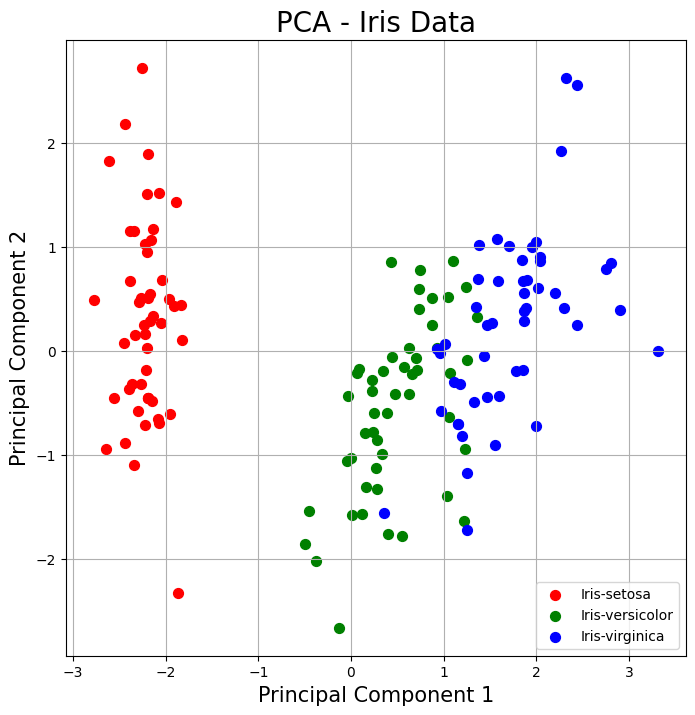

In [ ]:
# Perform PCA on the original data (so that 4-D data can be visualised in 2-D)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardizing the features
x= StandardScaler().fit_transform(X)


# perform PCA
pca = PCA(n_components=2) # 2 components = 2 Dimensions
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['class']]], axis = 1)


# plotting the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA - Iris Data', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

It can be seen that the iris data set contains 3 real clusters.

**Visualisation of random uniform data in the same space**

We now generate a random uniform dataset and visually inspect if it has any clusters. Again, we use PCA for dimensionality reduction

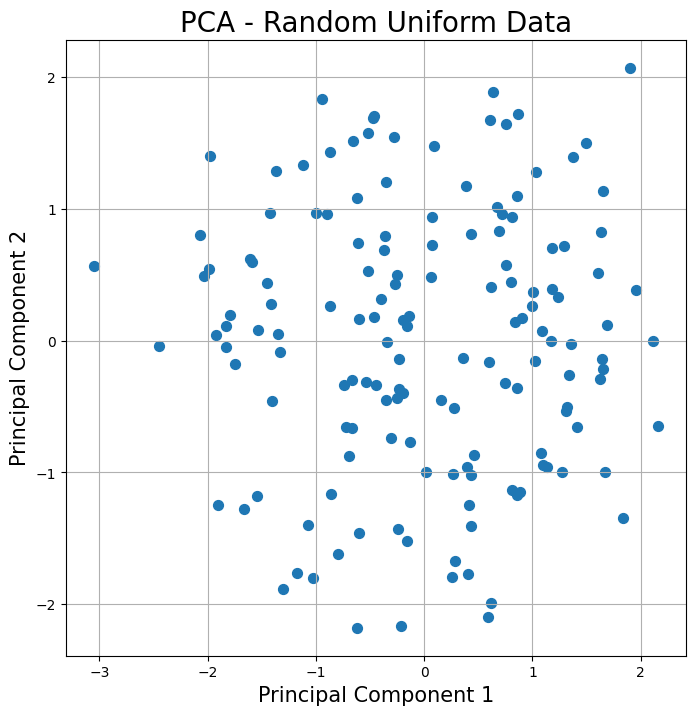

In [ ]:
X_uniform_random = np.random.uniform(X.min(axis=0), X.max(axis=0) ,(X.shape) )

# Standardizing the features
x= StandardScaler().fit_transform(X_uniform_random)


#perform PCA
pca = PCA(n_components=2) #2 components = 2 Dimensions
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = principalDf



#plotting the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA - Random Uniform Data', fontsize = 20)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], s = 50)

ax.grid()

The iris data set contains 3 real clusters. However the randomly generated data set doesn't contain any meaningful clusters.
**Thus, we expect the cluster tendency of iris dataset to be high.**

**Computing Hopkin's Statistics for Iris dataset**

In [ ]:
# call the function on the iris dataset
H=hopkins_statistic(X)
print(H)

0.8244178815773784


In [ ]:
# call the function on the iris dataset
H2=hopkins_statistic(finalDf)
print(H2)

0.7311844046988544


Since multiple calls of the function will result in different values of $H$, we call the function and compute Hopkins' Statistic multiple times, and take its average.

In [ ]:
l = [] # list to hold values for each call
for i in range(20):
    H=hopkins_statistic(X)
    l.append(H)

np.mean(l) # print average value

0.8355843846132341

**Interpretation of Hopkins' Statistic:**

If $X$ were uniformly distributed, then the distances for the real and artificial (uniform, random data) points would be close to each other, and thus $H$ would be about $0.5$. However, if clusters are present in $X$, then the distances for artificial points would be substantially larger than for the real ones in expectation, and thus the value of $H$ will increase.

A value for $H$ higher than $0.75$ indicates a clustering tendency at the $90\%$ confidence level.

The null and the alternative hypotheses are defined as follow:

- Null hypothesis: the data set $X$ is uniformly distributed (i.e., no meaningful clusters)
- Alternative hypothesis: the data set $X$ is not uniformly distributed (i.e., contains meaningful clusters)

Therefore, we can interpret Hopkins' statistic in the following manner:

- If the value is between $\{0.01, ...,0.3\}$, the data is regularly spaced.

- If the value is around $0.5$, it is random.

- If the value is between $\{0.7, ..., 0.99\}$, it has a high tendency to cluster.

Since the value of Hopkins' Statistic obtained here $(\approx 0.83)$ is $> 0.75$, we reject the null hypothesis, and conclude the iris dataset is significantly a clusterable data.

# Lesson 6 (27/10/2024)

## Theory Lecture

### Preparing the data

In [ ]:
from sklearn import datasets

In [ ]:
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df.shape

(178, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

### Perform PCA on the Preprocessed Dataset

* To find the principal components, we can use the PCA class from scikit-learn's decomposition module.

* Let's instantiate a PCA object by passing in the number of principal components `n_components` to the constructor.

* The number of principal components is the number of dimensions that you'd like to reduce the feature space to. These components are linear combinations of the original features.

In [ ]:
from sklearn.decomposition import PCA # to perform dimensionality reduction
pca = PCA(n_components=3) # initializes the pca object

'''
The fit_transform() method:
 - Fits the PCA model to your data by calculating the principal components.
 - Transforms your data into the new reduced-dimensional space defined by these components.
 - The result x is a new dataset where each row represents a sample (the 176 rows of the scaled_df)
   projected onto the 3 (n_components) principal components (columns).
'''
x=pca.fit_transform(scaled_df)
x

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00,  1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00,  6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00,  6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00,  1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00,  2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00,  1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00,  2.32730534e+00

Instead of having 13 columns (as in `df` or `scaled_df`), we only have 3 in `x`

Notice how the steps in principal component analysis such as computing the covariance matrix, performing eigendecomposition or singular value decomposition on the covariance matrix to get the principal components have all been abstracted away when we use scikit-learn’s implementation of PCA.

### Examining Some Useful Attributes of the PCA Object

* The PCA instance `pca` that we created has several useful attributes that help us understand what is going on under the hood.

* The attribute `components_` stores the directions of maximum variance (the principal components). Each row in the output corresponds to one principal component

* To get the weights (or "loadings") of the original features for each principal component.

It is probably better to understand all this with a simpler example (only with 3 features originally, and with `n_components=3`). Let the output of `print(pca.components_)` be:

`[[ 0.6  0.7  0.4]`

`[ 0.5 -0.2 -0.8]`

`[-0.6  0.6 -0.5]]`

 * First Principal Component (`[0.6, 0.7, 0.4]`):
  * This is the first principal component, capturing the maximum variance in the data.
  * Indicates that the first principal component is a linear combination of 60% of Feature 1, 70% of Feature 2, and 40% of Feature 3.
  * PC1 $= 0.6\cdot$Feature 1 $+ 0.7\cdot$ Feature 2 $ + 0.4\cdot$ Feature3

 * Second Principal Component (`[0.5, -0.2, -0.8]`):
    * This component captures the second-highest variance, orthogonal to PC1.
    * Indicates a direction that emphasizes Feature 1 and Feature 3 but de-emphasizes Feature 2.
    * PC2 $= 0.5\cdot$Feature 1 $ - 0.2\cdot$ Feature 2 $ - 0.8\cdot$ Feature3

 * Third Principal Component (`[-0.6, 0.6, -0.5]`):
    * Indicates another direction in feature space, orthogonal to the first two, and capturing the remaining variance
    * PC3 $= -0.6\cdot$Feature 1 $ + 0.6\cdot$ Feature 2 $ - 0.5\cdot$ Feature3


**Key Notes**

 1. Magnitude of Loadings: Larger absolute values indicate greater influence of a feature on that principal component.
 2. Signs (Positive/Negative):
  * A positive sign means that as the feature increases, so does the principal component.
  * A negative sign means the feature and principal component move in opposite directions.
 3. Orthogonality: All principal components are orthogonal, meaning they capture different, independent patterns of variability in the data.
 4. Variance represents the "spread" of data along a particular axis (or direction).
  * A higher variance means the data points are more spread out, while a lower variance means they are closer together.
  * The first principal component captures the largest possible variance in the data.
  * The second principal component captures the next largest variance, and so on, under the constraint that it is orthogonal to the previous components.

Going back to our case

* Since our dataset `df` had 13 features (columns) before the PCA, `pca.components_` will be a $3\times 13$ array (remember `n_components = 3`)

* Each row has 13 values, one for each feature in the dataset.

In [ ]:
print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


Text(0, 0.5, 'pc1')

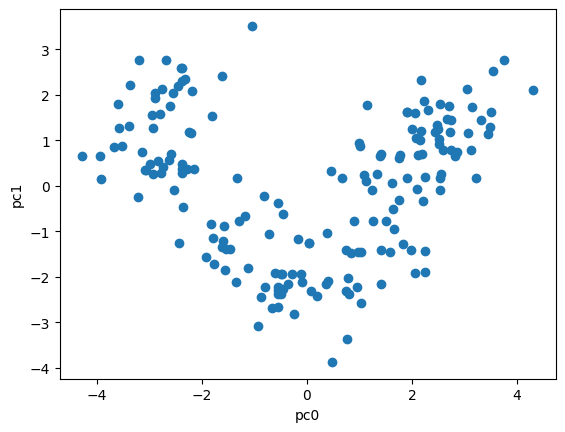

In [ ]:
# x[:,0] selects all rows from x, but only the first column (column 0), i.e. pc1
plt.scatter(x[:,0],x[:,1]) # draws pc1 and pc2
plt.xlabel('pc0')
plt.ylabel('pc1')

Text(0, 0.5, 'pc2')

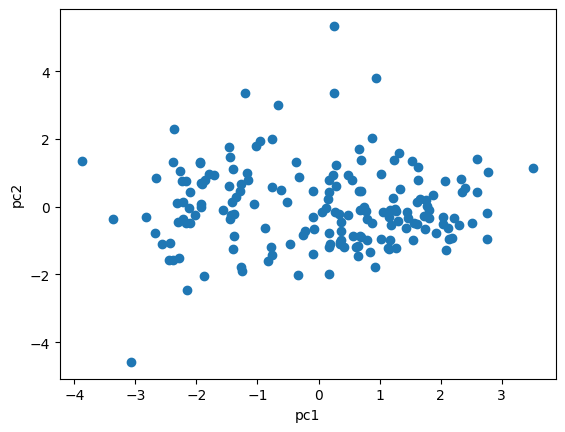

In [ ]:
plt.scatter(x[:,1],x[:,2]) # draws pc2, pc3
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0, 0.5, 'pc2')

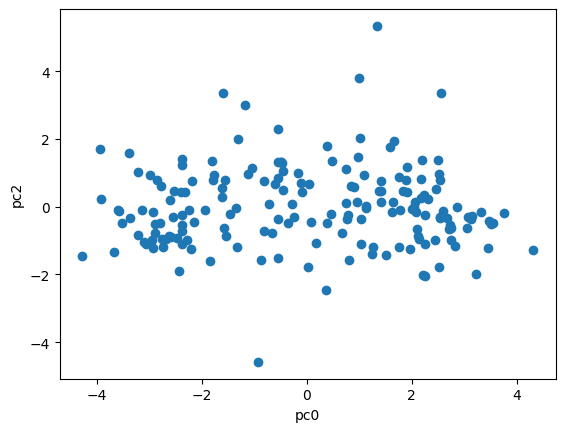

In [ ]:
plt.scatter(x[:,0],x[:,2]) # draws pc1, pc3
plt.xlabel('pc0')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

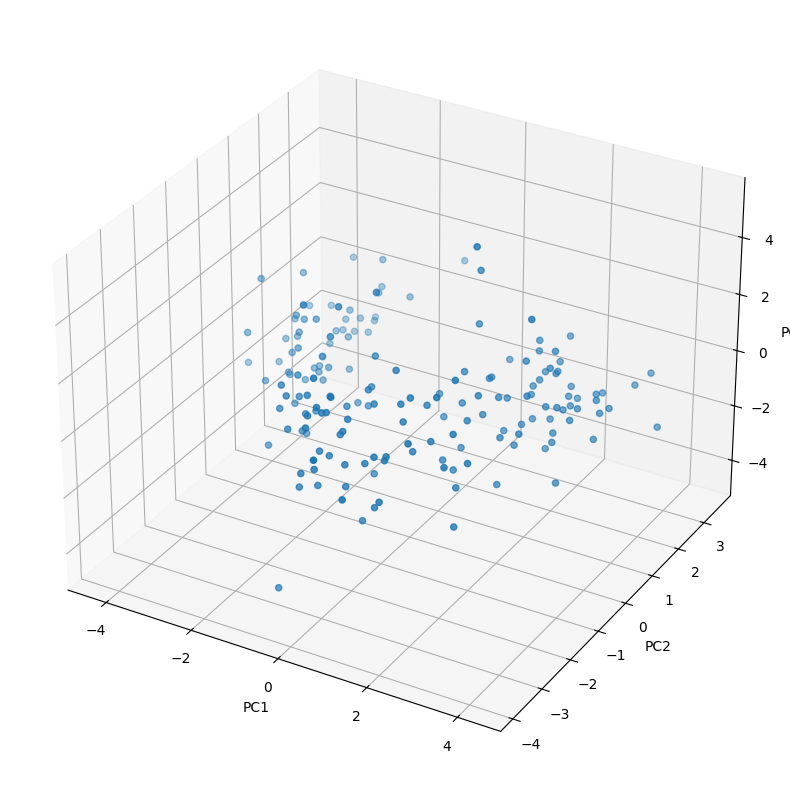

In [ ]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2])
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

**How do we measure how much of the total variance is captured in the number of principal components we just chose?**

The `explained_variance_ratio_` attribute provides the proportion of the total variance explained by each principal component.

In [ ]:
# how much variance is explained by EACH principal component
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631]


The first one explains 36%, the second 19% and the third 11%

Now we can sum up the ratios to get the total variance in the chosen number of components.

In [ ]:
sum(pca.explained_variance_ratio_)

0.6652996889318524

Here, we see that three principal components capture over 66.5% of total variance in the dataset.

### Analyzing the Change in Explained Variance Ratio

In [ ]:
var_ratio = []

for num in range(14):
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

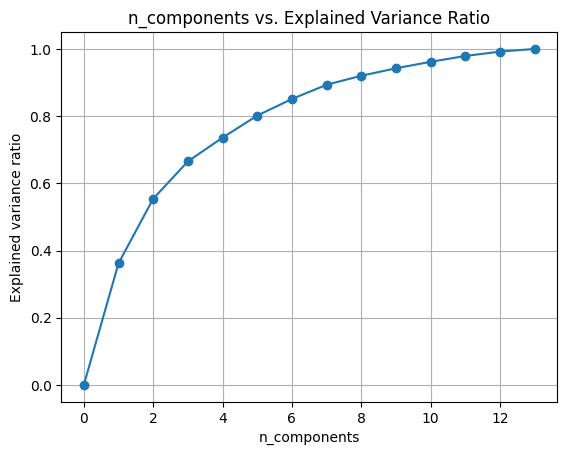

In [ ]:
plt.grid()
plt.plot(range(14), var_ratio, marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

* When we use all the 13 components, the `explained_variance_ratio_` is 1.0 indicating that we've captured 100% of the variance in the dataset.

* With 6 principal components, we'll be able to capture more than 80% of variance in the input dataset.

* **It is assumed that the variance should be reflected in the principal components by more than 80 percent.**

## Laboratory Lecture

The $k$NN algorithm can be summarized by the following steps:

 1. Choose the number of $k$ and a distance metric
 2. Find the $k$-nearest neighbors of the data record that we want to classify
 3. Assign the class label by majority vote

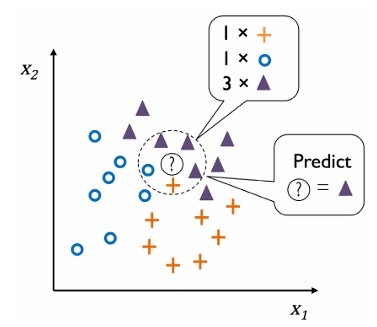

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wisc_bc_data.csv to wisc_bc_data.csv


In [ ]:
wbcd=pd.read_csv('/content/wisc_bc_data.csv')
wbcd

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
wbcd.isna().sum() # check the missing values (there are not)

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


### Target variable

In [ ]:
wbcd.diagnosis.describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
wbcd.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
wbcd.diagnosis.value_counts(normalize=True)  # 62% B and 37% M

,proportion
diagnosis,
B,0.627417
M,0.372583


<Axes: xlabel='diagnosis', ylabel='count'>

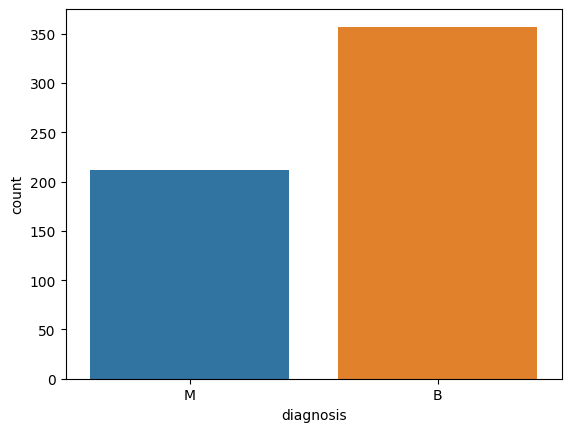

In [ ]:
sns.countplot(x="diagnosis", data=wbcd, hue="diagnosis")

In [ ]:
# X = wbcd[wbcd.columns[2:32]] # this also works
X = wbcd.drop(['id', 'diagnosis'], axis=1)
y = wbcd.diagnosis

### kNN

We must divide our data set into train set (70%) and test set (30%)

* Train test split (Holdout Method) is a model validation procedure that allows us to simulate how a model would perform on new/unseen data.
*  In practice, the most commonly used splits are 60:40, 70:30, or 80:20, depending on the size of the initial dataset.
* However, for large datasets, 90:10 or 99:1 splits are also common and appropriate.

For example, if the dataset contains more than 100,000 training examples, it might be fine to withhold only 10,000 examples for testing in order to get a good estimate of the generalization performance.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # the size of the test
# we can cut the first 70%, but also to take them randomly. For different random_set we have different training sets

In [ ]:
y_train.value_counts(normalize=True) # it must have almost the same percentage as the original

,proportion
diagnosis,
B,0.625628
M,0.374372


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# We only standarize X because y is categorical
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Model**

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)  #k=3

# training model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Prediction**

In [ ]:
# prediction
y_pred = classifier.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

#### Evaluating the model

For this, we use the concept of accuracy:
$$
ACC = \frac{TP+TN}{TN+FP+FN+TP}
$$

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9649122807017544

**Confusion matrix**
$$
 TN | FP
$$
$$
 FN | TP
$$

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm) # to see the TP, TN, FP, FN

[[106   2]
 [  4  59]]


<Axes: >

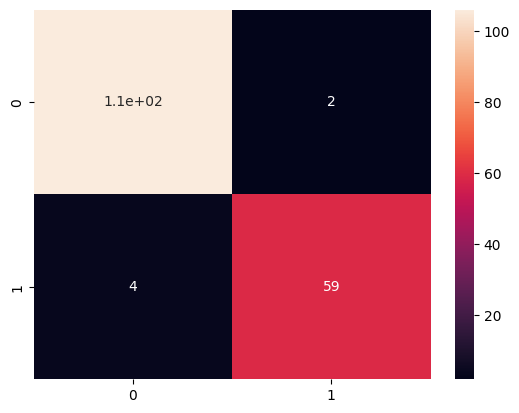

In [ ]:
sns.heatmap(cm, annot=True)

#### The optimal number of neighbors

The right choice of $k$ is crucial to finding a good balance between overfitting and underfitting.

In [ ]:
error1= []
error2= []

for k in range(1,21,2):
  knn=KNeighborsClassifier(k)
  knn.fit(X_train,y_train) # the model is trained on the training set
  y_pred1=knn.predict(X_train)
  error1.append(np.mean(y_train!=y_pred1)) # error rate is calculated as the mean of misclassified examples
  y_pred2=knn.predict(X_test)
  error2.append(np.mean(y_test!=y_pred2))

We should look for the $k$ where the test error (`error2`) is minimized.

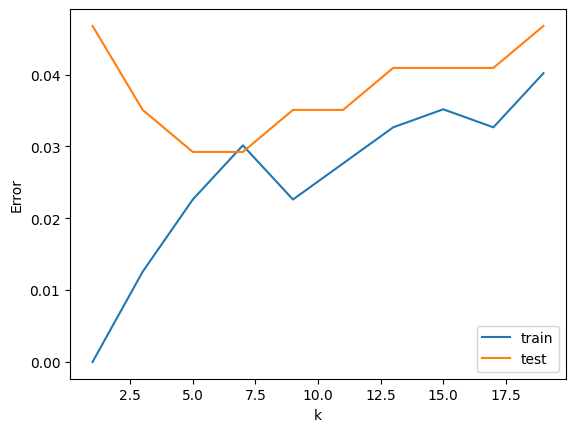

In [ ]:
plt.plot(range(1,21,2), error1, label="train")
plt.plot(range(1,21,2), error2, label="test") # these are more important
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()

In [ ]:
accuracy_rate = []

for k in range(1,10) :
  c1=KNeighborsClassifier(k)
  c1.fit(X_train,y_train)
  y_pr=c1.predict(X_test)
  score=accuracy_score(y_test,y_pr)
  accuracy_rate.append(score)

We should look for the value of $k$ where accuracy is highest on the test set.

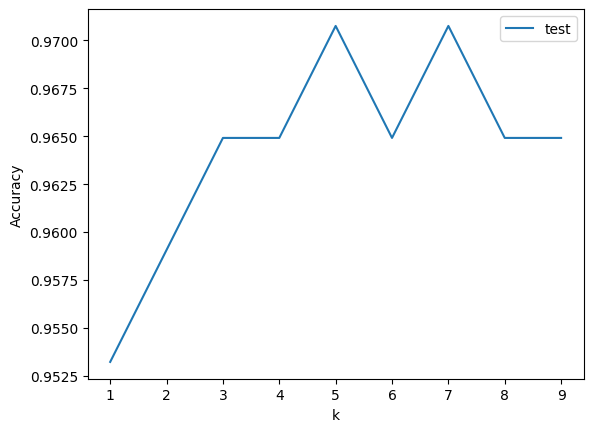

In [ ]:
plt.plot(range(1,10), accuracy_rate, label="test")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

The best option, according to the two graphs we've plotted, is **$k=7$**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7) # k=7
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [ ]:
accuracy_score(y_test,y_pred) # better

0.9707602339181286

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  3  60]]


<Axes: >

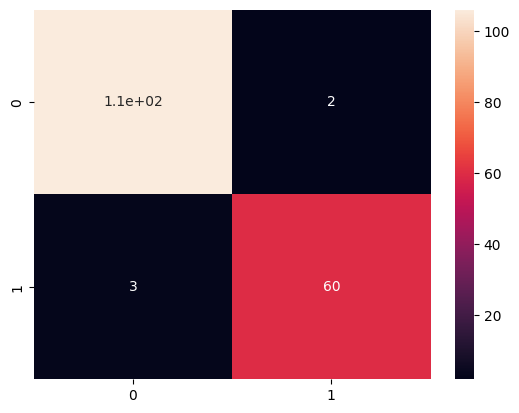

In [ ]:
sns.heatmap(cm, annot=True)

* $k$NN is very susceptible to overfitting due to the curse of dimensionality.
* The **curse of dimensionality**  describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset.
* We can think of even the closest neighbors as being too far away in a high-dimensional space to give a good estimate.

**Distance metric remark**

Choosing the rightdistance metric that is appropriate for the features in the dataset.
Often, a simple Euclidean distance measure is used for real-value examples. However, if we are using a Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance.
 The minkowski distance is just a generalization of
the Euclidean and Manhattan distance, which can be written as follows:
$$ d(x^{(i)},x^{(j)})=\sqrt[p]{\sum_k |x^{(i)}_k-x^{(j)}_k|^p}$$
 It becomes the Euclidean distance if we set the parameter $p=2$ or the Manhattan distance at $p=1$.

In [ ]:
classiferm = KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2 ) # p=2 default

**Preparation of the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sna.csv to sna.csv


In [ ]:
data = pd.read_csv('/content/sna.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


The decision tree usually can handle both numerical and categorical features. The treatment of categorical data becomes crucial during the tree-building process. Categorical features have string values. For example, Gender has two levels either Male or Female.

In this case we have an error saying that it cannot convert string to float. In So learners like logistic regression, distance based methods such as kNN, support vector machines, tree based methods etc. in sklearn needs numeric arrays. **Features having string values cannot be handled by these learners.**

We can use two strategies
* Label Encoding
* One-Hot Encoding

Label encoding involves converting categorical data into numerical format by assigning a distinct integer label to each category or class.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
data = data[['Gender', 'Age', 'EstimatedSalary', 'Purchased']] # drop User ID column

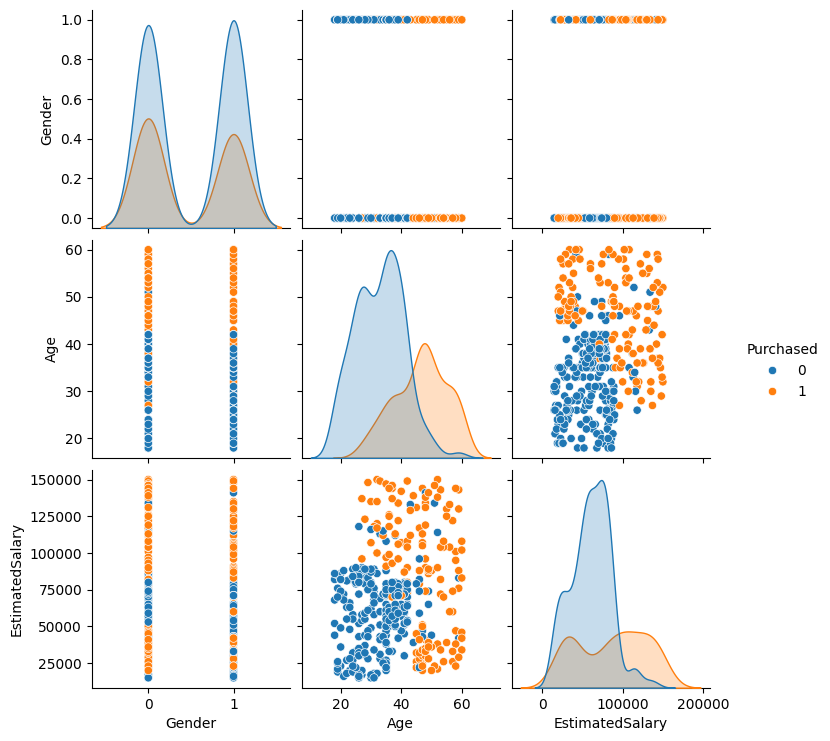

In [ ]:
sns.pairplot(data=data, hue='Purchased')
plt.show()

### Test and Training sets

In [ ]:
X = data.drop(['Purchased'], axis=1)
y = data['Purchased'] # target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64
Purchased
0    0.646667
1    0.353333
Name: proportion, dtype: float64
Purchased
0    0.63
1    0.37
Name: proportion, dtype: float64


**Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_01 = DecisionTreeClassifier()
model_01.fit(X_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [ ]:
pred = model_01.predict(X_test)
pred[:5]

array([1, 1, 0, 0, 0])

In [ ]:
model_01.predict(pd.DataFrame({'Gender':[1], 'Age':[30], 'EstimatedSalary':[77000]}))

array([0])

**Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) # this is the way

array([[57,  6],
       [ 9, 28]])

In [ ]:
confusion_matrix(pred,y_test) # this is not

array([[57,  9],
       [ 6, 28]])

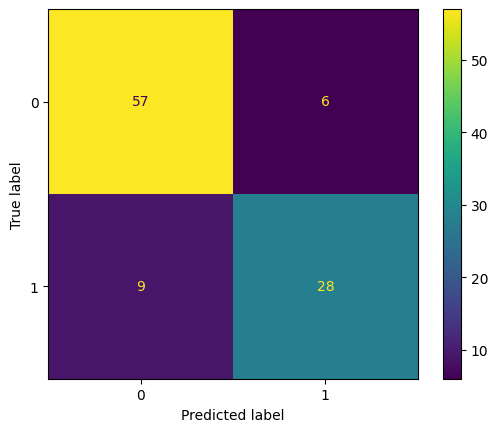

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=model_01.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_01.classes_)
disp.plot()
plt.show()

$$
 TN | FP
$$
$$
 FN | TP
$$

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.85

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(tn, fp, fn, tp)

57 6 9 28


### Visualization

[Text(0.5060975609756098, 0.9666666666666667, 'Age <= 42.5\ngini = 0.457\nsamples = 300\nvalue = [194.0, 106.0]'),
 Text(0.2682926829268293, 0.9, 'EstimatedSalary <= 90500.0\ngini = 0.289\nsamples = 217\nvalue = [179, 38]'),
 Text(0.3871951219512195, 0.9333333333333333, 'True  '),
 Text(0.1951219512195122, 0.8333333333333334, 'Age <= 36.5\ngini = 0.074\nsamples = 182\nvalue = [175, 7]'),
 Text(0.17073170731707318, 0.7666666666666667, 'gini = 0.0\nsamples = 121\nvalue = [121, 0]'),
 Text(0.21951219512195122, 0.7666666666666667, 'EstimatedSalary <= 83500.0\ngini = 0.203\nsamples = 61\nvalue = [54, 7]'),
 Text(0.1951219512195122, 0.7, 'EstimatedSalary <= 67500.0\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(0.17073170731707318, 0.6333333333333333, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.21951219512195122, 0.6333333333333333, 'Age <= 41.5\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.14634146341463414, 0.5666666666666667, 'EstimatedSalary <= 70500.0\ngini = 0

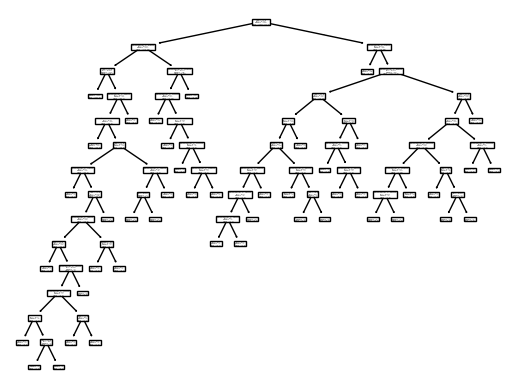

In [ ]:
from sklearn import tree

features = ['Gender', 'Age', 'EstimatedSalary']  # names of our variables
tree.plot_tree(model_01, feature_names=features) # shilouette of the tree

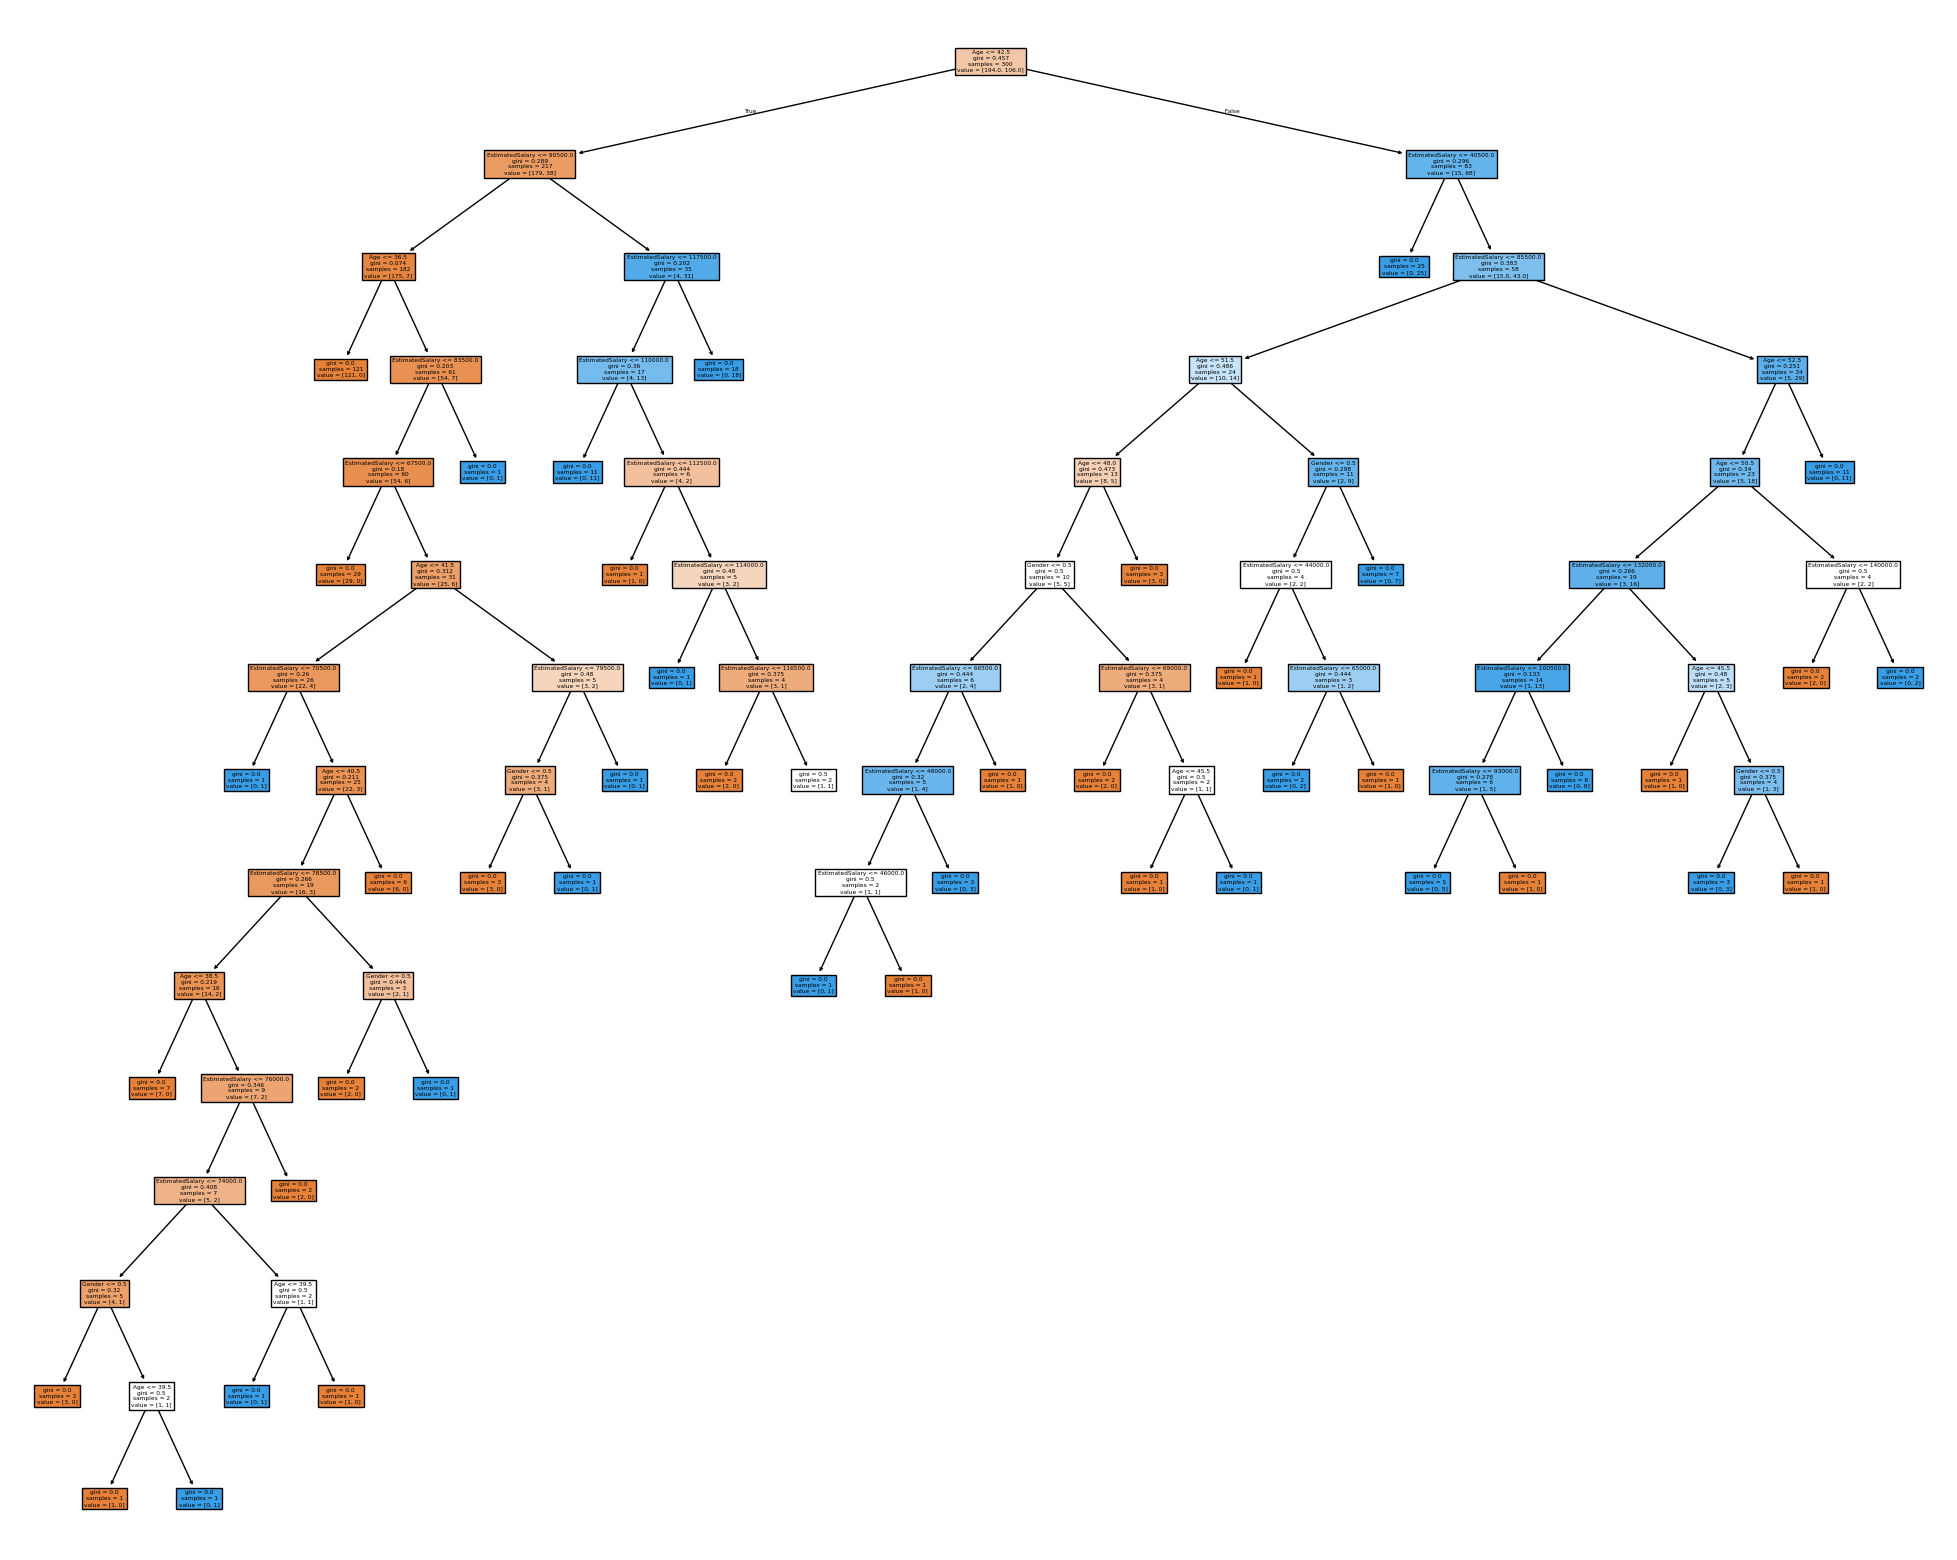

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   filled=True)

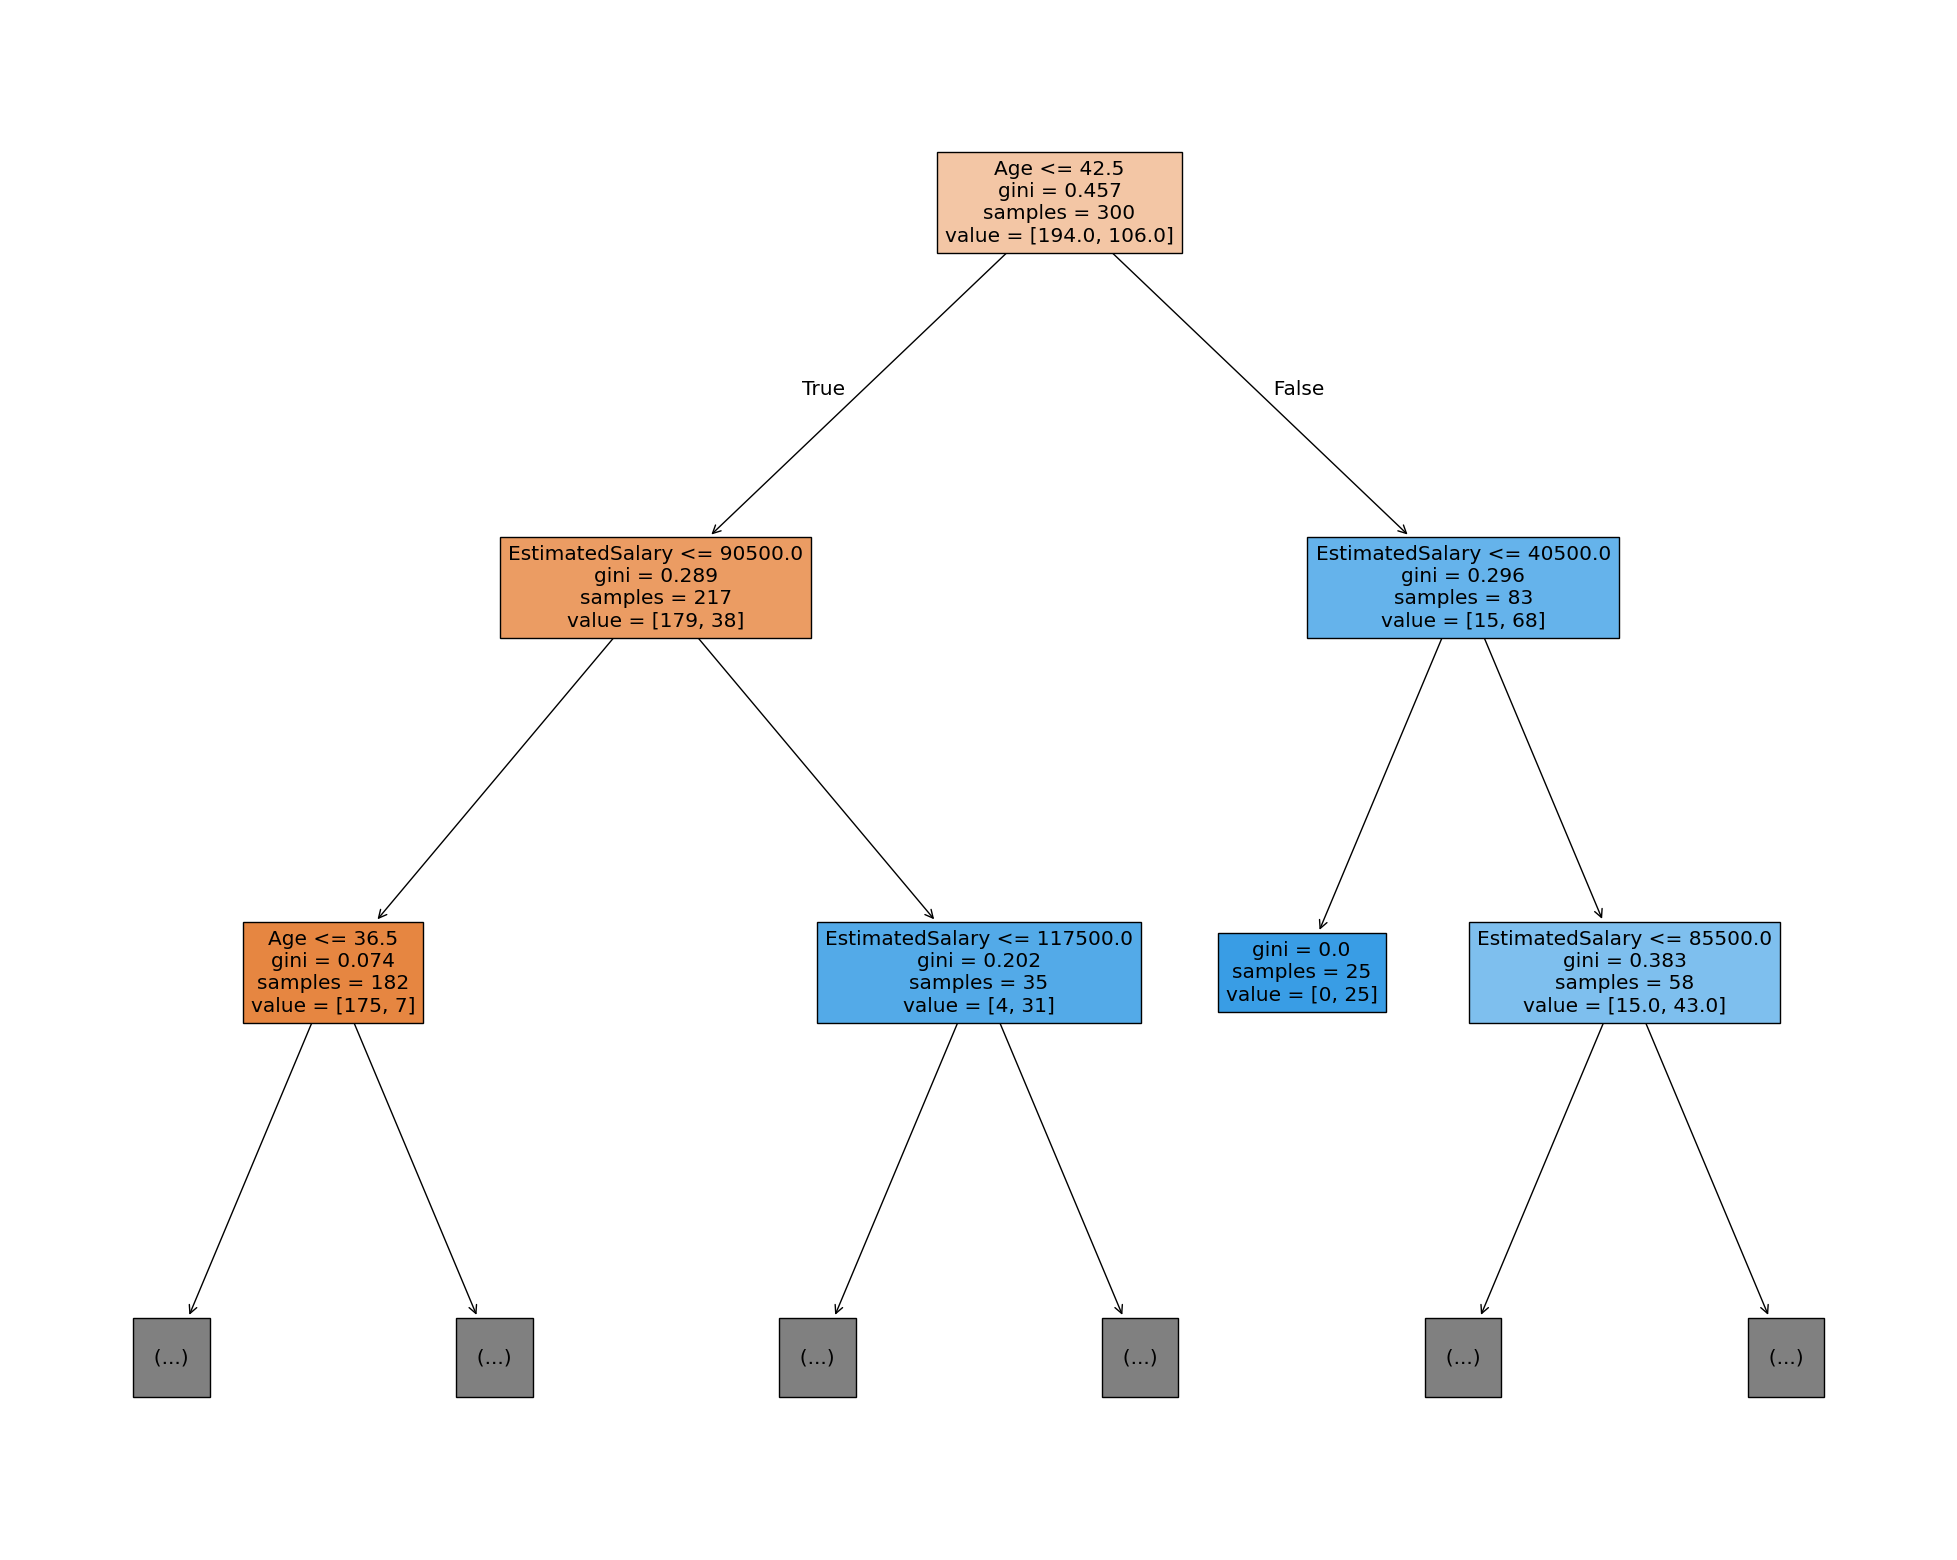

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   max_depth=2,
                   filled=True)

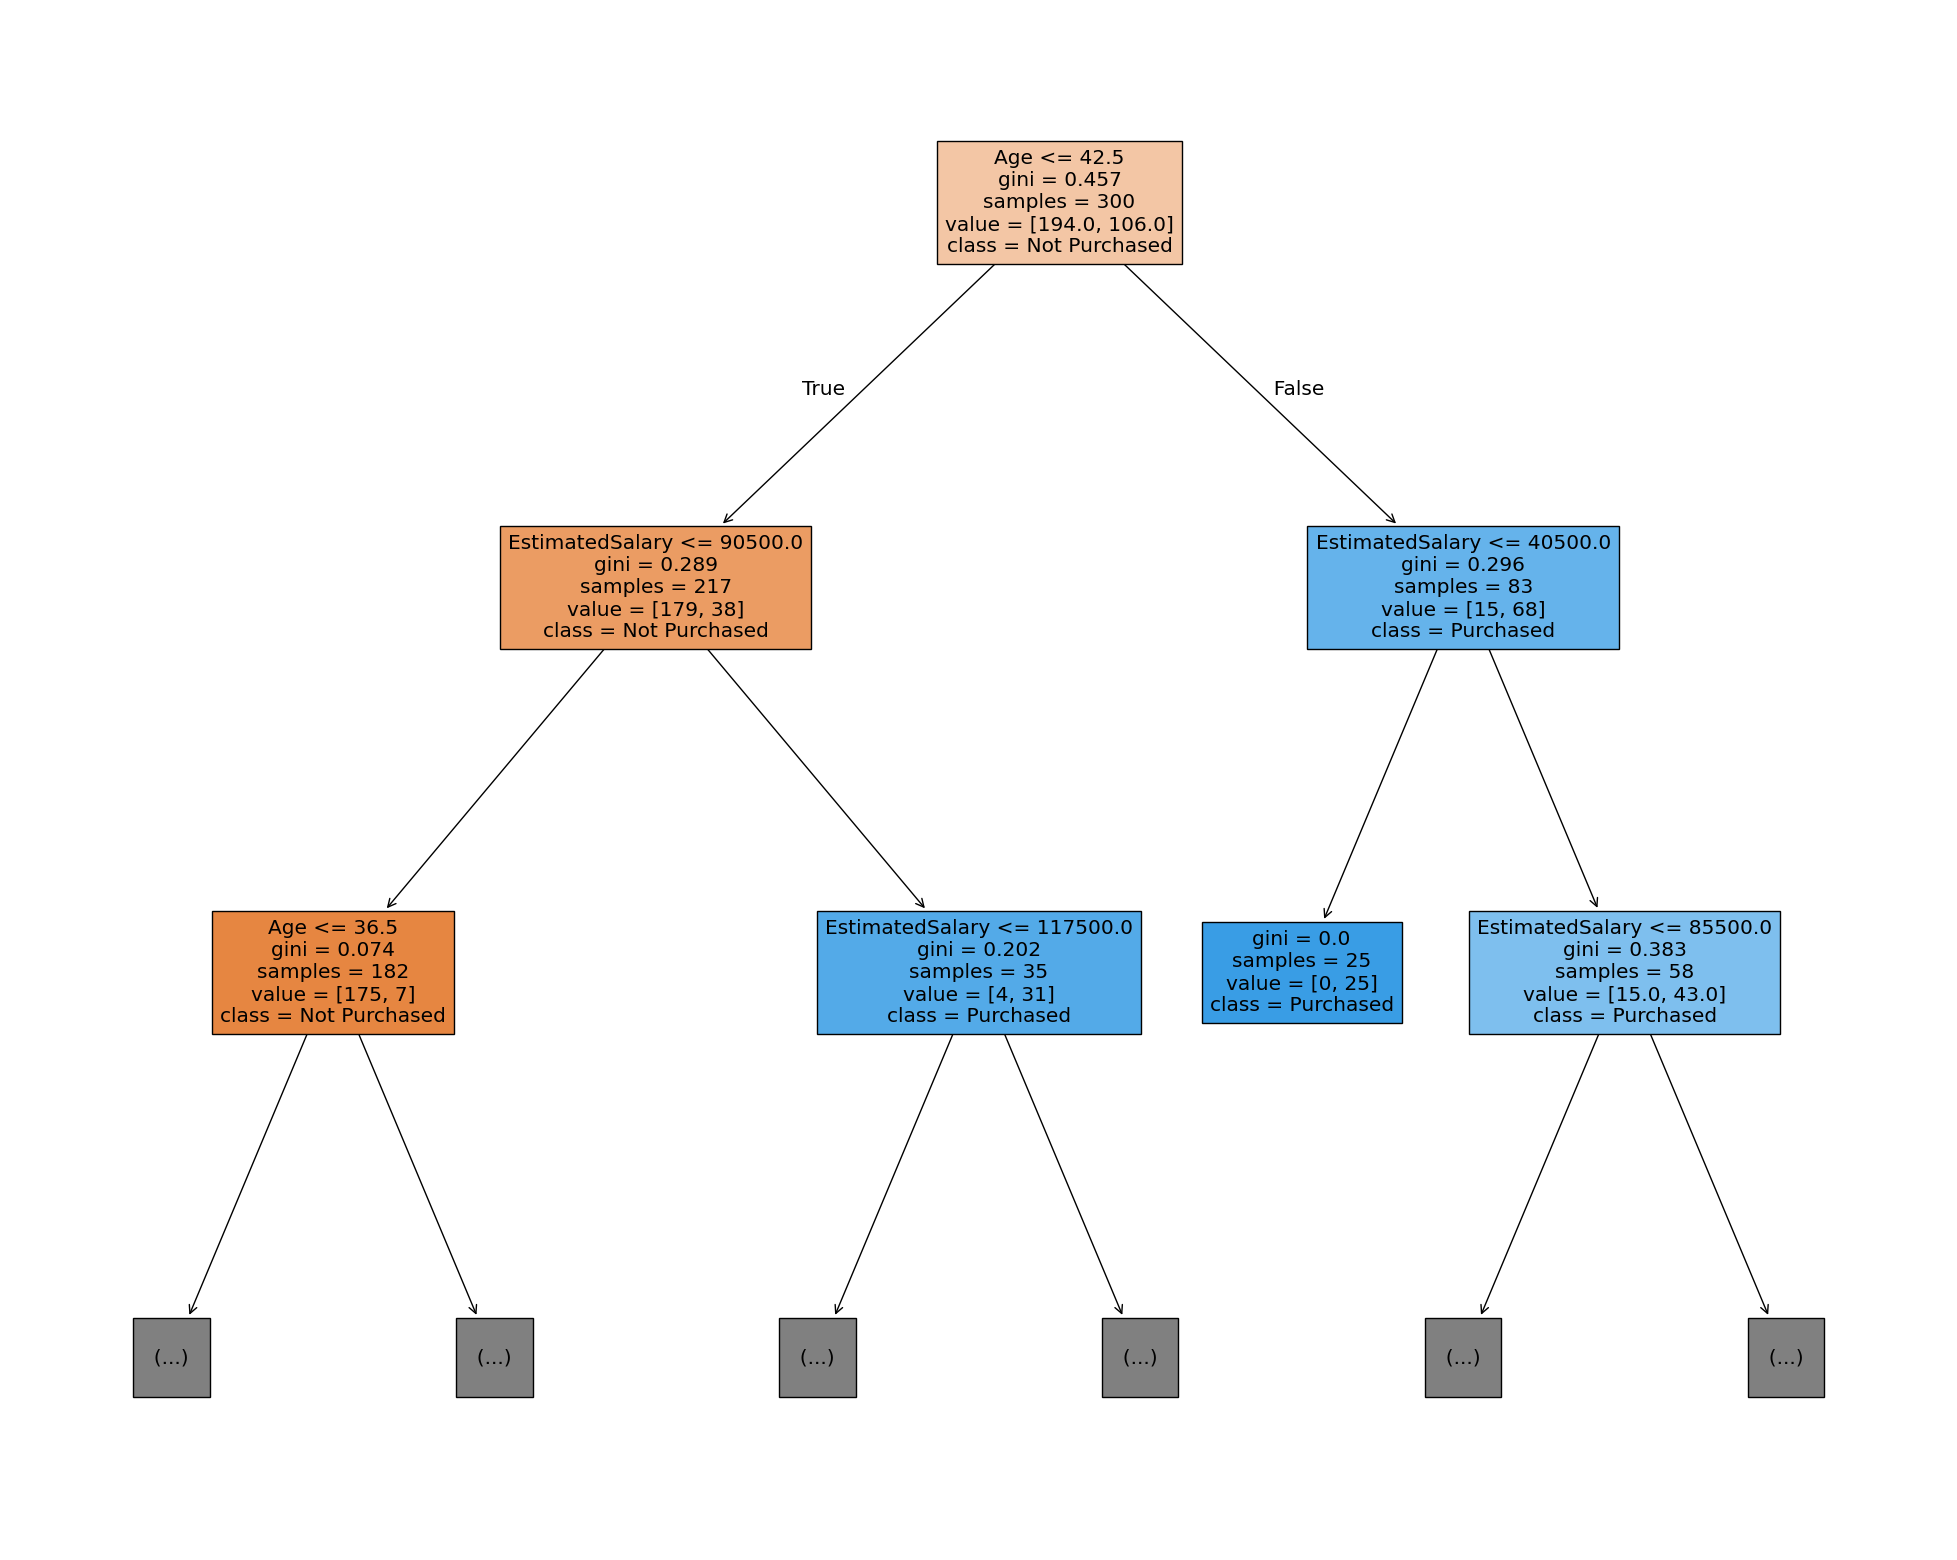

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   max_depth=2,
                   class_names=['Not Purchased', 'Purchased'],
                   filled=True)

In [ ]:
text_tree = tree.export_text(model_01,
                             feature_names=features,
                             max_depth=2)
print(text_tree)

|--- Age <= 42.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- truncated branch of depth 12
|   |--- EstimatedSalary >  90500.00
|   |   |--- EstimatedSalary <= 117500.00
|   |   |   |--- truncated branch of depth 5
|   |   |--- EstimatedSalary >  117500.00
|   |   |   |--- class: 1
|--- Age >  42.50
|   |--- EstimatedSalary <= 40500.00
|   |   |--- class: 1
|   |--- EstimatedSalary >  40500.00
|   |   |--- EstimatedSalary <= 85500.00
|   |   |   |--- truncated branch of depth 7
|   |   |--- EstimatedSalary >  85500.00
|   |   |   |--- truncated branch of depth 6



[Model parameters](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
model_01.get_params() # check what parameters were used to build this model
# model_01 is not perfect. It is very overfitted

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
model_02 = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3)
model_02.fit(X_train, y_train)
pred2 = model_02.predict(X_test)

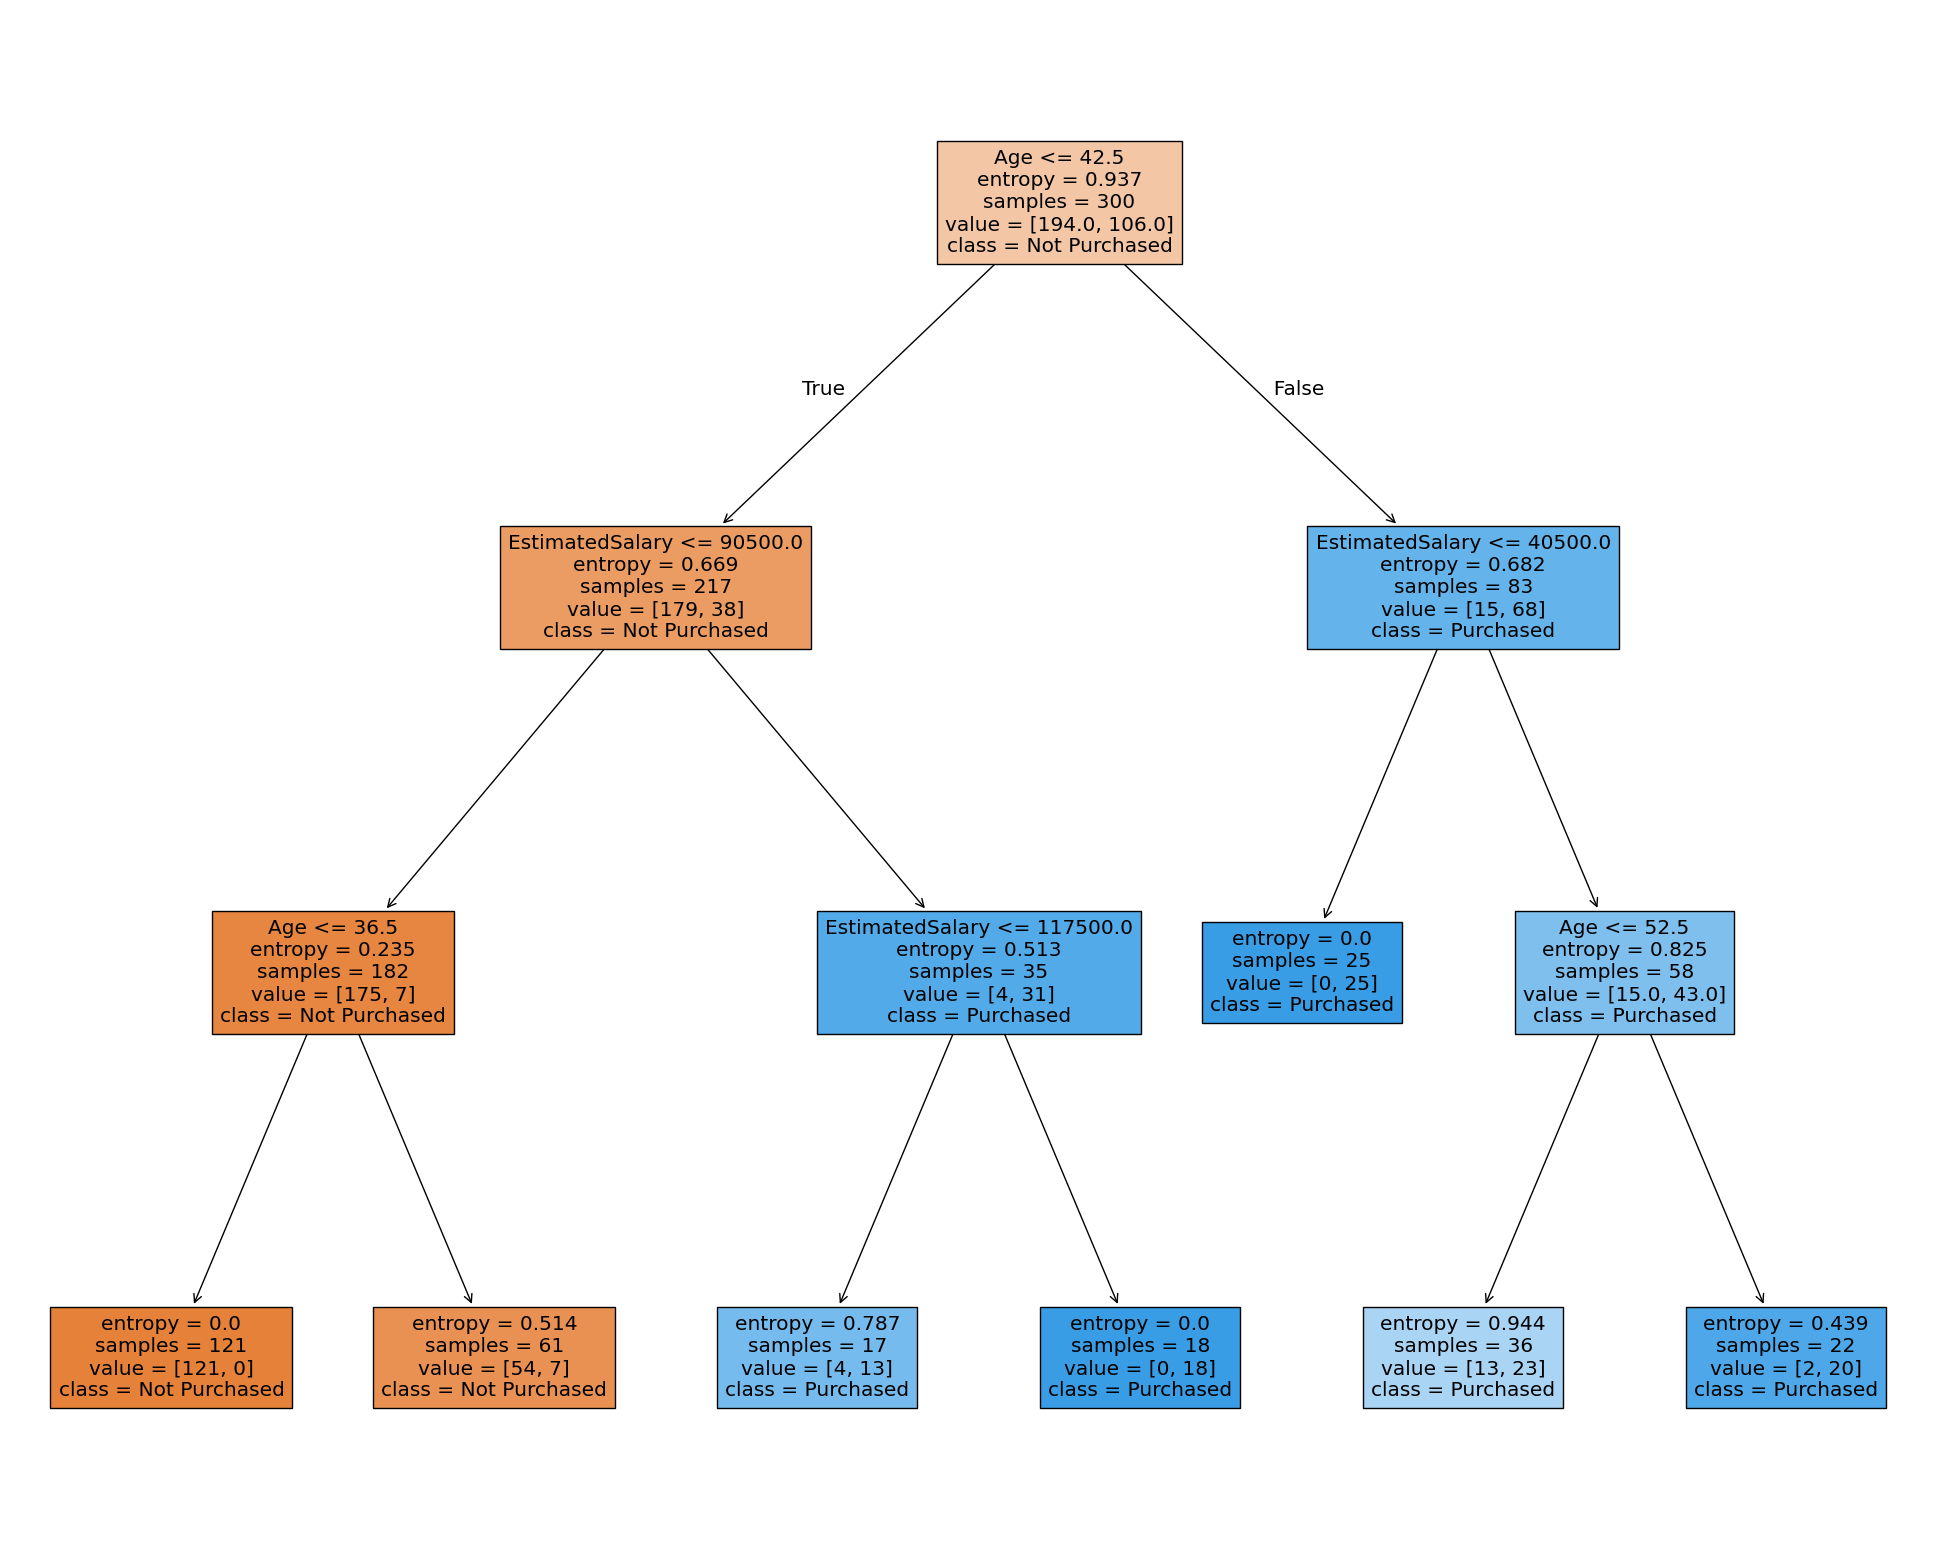

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_02,
                   feature_names=features,
                   class_names=['Not Purchased', 'Purchased'],
                   filled=True)

**Root**
1. Condition
2. entropy/gini etc in the hole dataset
3. Number of samples: 300, of which 194 no purchase and 106 purchase

In [ ]:
print(confusion_matrix(y_test, pred2))

[[57  6]
 [ 2 35]]


In [ ]:
accuracy_score(y_test, pred2) # greater in this second model

0.92

In [ ]:
pred2_train = model_02.predict(X_train)
accuracy_score(y_train, pred2_train) # almost the same than in the test, so it is much better than the first model

0.9133333333333333

In [ ]:
pred_train = model_01.predict(X_train)
accuracy_score(y_train,pred_train) # in the test the result is smaller, so it is overfitted

In [ ]:
print(confusion_matrix(y_train, pred_train))

[[194   0]
 [  1 105]]


**Find observations in the leaf**

 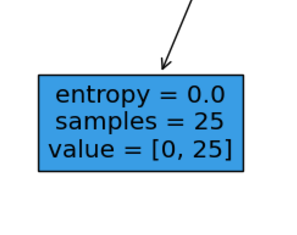

In [ ]:
df=X_train.copy()
df['Purchased']=y_train
df

,Gender,Age,EstimatedSalary,Purchased
247,0,57,122000,1
110,0,39,71000,0
16,1,47,25000,1
66,1,24,19000,0
153,0,36,50000,0
...,...,...,...,...
71,0,24,27000,0
106,0,26,35000,0
270,0,43,133000,0
348,1,39,77000,0


In [ ]:
leaf1 = df.loc[(df.Age > 42.5) & (df.EstimatedSalary <= 40500)]
leaf1

,Gender,Age,EstimatedSalary,Purchased
16,1,47,25000,1
19,0,48,29000,1
355,1,60,34000,1
292,1,55,39000,1
386,0,49,39000,1
17,1,45,26000,1
24,1,46,23000,1
375,0,46,32000,1
23,0,45,22000,1
283,0,52,21000,1


In [ ]:
leaf1.shape

(25, 4)

**Importance of variables**

In [ ]:
model_02.feature_importances_

array([0.        , 0.49257243, 0.50742757])

Text(0, 0.5, 'Variable')

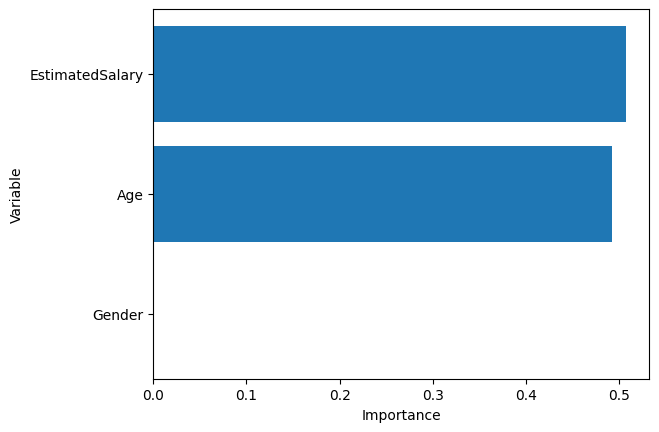

In [ ]:
plt.barh(range(3), list(model_02.feature_importances_), align='center')
plt.yticks(np.arange(3), features)
plt.xlabel("Importance")
plt.ylabel("Variable")
# estimated Salary and age are the most important